In [2]:
#!pip install --upgrade scikit-learn imbalanced-learn
#### In this Approach we have One Model for four classes ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_all = pd.read_excel("data.xlsx",sheet_name = None)

In [3]:
order_sheet = data_all["order"]

In [4]:
order_sheet

,Order ID,Customer ID,Order Priority,Order Date,Market
0,ID-2014-65824,AA-10315,Medium,2014-01-07,Apac
1,IN-2014-55191,AA-10315,Medium,2014-12-23,Apac
2,IN-2013-58152,AA-10315,Medium,2013-12-31,Apac
3,ID-2012-65236,AA-10375,Medium,2012-08-28,Apac
4,IN-2014-25644,AA-10375,Medium,2014-12-25,Apac
...,...,...,...,...,...
25028,US-2011-152240,VG-21790,Low,2011-04-21,Latam
25029,MX-2013-131093,VG-21790,Low,2013-05-03,Latam
25030,MX-2011-168914,VG-21790,Low,2011-11-25,Latam
25031,MX-2013-155110,WB-21850,Low,2013-11-19,Latam


In [5]:
product_sheet = data_all["product"]

In [6]:
product_sheet

,Product ID,Product Name,Brand,Type,Description,Category,Sub-Category
0,OFF-PA-10000019,Xerox 1931,Xerox,1931,NaN,Office Supplies,Paper
1,OFF-PA-10000029,Xerox 224,Xerox,224,NaN,Office Supplies,Paper
2,OFF-PA-10000061,Xerox 205,Xerox,205,NaN,Office Supplies,Paper
3,OFF-PA-10000100,Xerox 1945,Xerox,1945,NaN,Office Supplies,Paper
4,OFF-PA-10000130,Xerox 199,Xerox,199,NaN,Office Supplies,Paper
...,...,...,...,...,...,...,...
10241,OFF-WIL-10000979,"Wilson Jones Hole Reinforcements, Recycled",Wilson,Jones Hole Reinforcements,Recycled,Office Supplies,Binders
10242,OFF-WIL-10001495,"Wilson Jones Index Tab, Recycled",Wilson,Jones Index Tab,Recycled,Office Supplies,Binders
10243,OFF-WIL-10002787,"Wilson Jones Binder, Recycled",Wilson,Jones Binder,Recycled,Office Supplies,Binders
10244,OFF-WIL-10003299,"Wilson Jones Binding Machine, Recycled",Wilson,Jones Binding Machine,Recycled,Office Supplies,Binders


In [7]:
product_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10246 entries, 0 to 10245
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    10246 non-null  object
 1   Product Name  10246 non-null  object
 2   Brand         10246 non-null  object
 3   Type          10199 non-null  object
 4   Description   8855 non-null   object
 5   Category      10246 non-null  object
 6   Sub-Category  10246 non-null  object
dtypes: object(7)
memory usage: 560.5+ KB


In [8]:
product_sheet["Category"].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

In [9]:
#product_sheet["Brand"].unique()

In [10]:
product_sheet["Sub-Category"].unique()

array(['Paper', 'Appliances', 'Envelopes', 'Fasteners', 'Labels',
       'Storage', 'Supplies', 'Art', 'Binders', 'Phones', 'Accessories',
       'Furnishings', 'Bookcases', 'Chairs', 'Tables', 'Copiers',
       'Machines'], dtype=object)

In [11]:
#product_sheet["Brand"].unique()

In [12]:
len(product_sheet["Product Name"].unique())

3662

In [13]:
returned_sheet = data_all["returned"]

In [14]:
returned_sheet

,Order ID
0,CA-2011-100762
1,CA-2011-100867
2,CA-2011-102652
3,CA-2011-103373
4,CA-2011-103744
...,...
1167,US-2014-160745
1168,US-2014-161830
1169,US-2014-167178
1170,US-2014-167500


In [15]:
shipping_sheet = data_all["shipping"]

In [16]:
shipping_sheet

,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region
0,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West
1,40644,CA-2011-101462,2011-04-25,Standard Class,Los Angeles,California,United States,West
2,35333,CA-2011-107139,2011-07-11,Standard Class,Los Angeles,California,United States,West
3,44101,CA-2011-122679,2011-07-28,Standard Class,Los Angeles,California,United States,West
4,36969,US-2012-159513,2012-04-09,Standard Class,Los Angeles,California,United States,West
...,...,...,...,...,...,...,...,...
25028,32235,MX-2014-112431,2014-05-12,Standard Class,San Salvador,San Salvador,El Salvador,Central
25029,25660,MX-2012-125262,2012-09-17,Standard Class,San Salvador,San Salvador,El Salvador,Central
25030,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central
25031,27783,MX-2014-121993,2014-06-15,Standard Class,San Salvador,San Salvador,El Salvador,Central


In [17]:
shipping_sheet["Region"].unique()

array(['West', 'East', 'Central', 'South', 'Emea', 'Africa', 'North Asia',
       'North', 'Southeast Asia', 'Canada', 'Oceania', 'Central Asia',
       'Caribbean'], dtype=object)

In [18]:
#len(list(shipping_sheet["State"].unique()))

In [19]:
#shipping_sheet[shipping_sheet["Country"] == "Afghanistan"]

In [20]:
#shipping_sheet[shipping_sheet["Country"] == "Zambia"]

In [21]:
order_detail_sheet = data_all["order_detail"]

In [22]:
order_detail_sheet

,Index,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,422,MX-2014-106901,OFF-FA-10002084,17.4800,2,0.00,0.0000,1.684
1,953,MX-2014-105921,TEC-AC-10004626,342.0800,2,0.00,0.0000,21.713
2,1281,MX-2013-118402,OFF-BI-10001304,38.8800,2,0.00,0.0000,5.923
3,1593,MX-2013-110933,TEC-PH-10003935,186.3600,2,0.00,0.0000,19.783
4,1927,MX-2011-116246,OFF-SU-10003371,58.2800,2,0.00,0.0000,8.203
...,...,...,...,...,...,...,...,...
49630,28701,IN-2013-35542,OFF-ST-10003606,17.9280,2,0.17,1.7280,2.090
49631,28926,IN-2013-75988,OFF-AR-10001770,45.2682,2,0.17,13.5882,7.120
49632,28929,IN-2013-75988,OFF-ST-10004346,90.7854,2,0.17,-4.4346,17.650
49633,28966,ID-2014-65026,OFF-BI-10004181,45.3678,2,0.17,-3.2922,5.690


In [23]:
customer_sheet = data_all["customer"]

In [24]:
customer_sheet

,Customer ID,Customer Name,Segment
0,AA-10315,Alex Avila,Consumer
1,AA-10375,Allen Armold,Consumer
2,AA-10480,Andrew Allen,Consumer
3,AA-10645,Anna Andreadi,Consumer
4,AB-10015,Aaron Bergman,Consumer
...,...,...,...
919,VM-21685,Valerie Mitchum,Home Office
920,VP-11730,Victor Preis,Home Office
921,VP-21730,Victor Preis,Home Office
922,VT-11700,Valerie Takahito,Home Office


In [25]:
customer_sheet['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [26]:
shipping_details_join = pd.merge(shipping_sheet,order_detail_sheet, how="inner", on="Order ID")

In [27]:
shipping_details_join

,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region,Index,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34361,OFF-AR-10004062,20.960,2,0.0,5.2400,1.560
1,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34363,OFF-ST-10001963,304.230,3,0.0,9.1269,11.270
2,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34362,OFF-BI-10004330,88.752,3,0.2,27.7350,4.770
3,40644,CA-2011-101462,2011-04-25,Standard Class,Los Angeles,California,United States,West,36882,FUR-FU-10000409,59.920,4,0.0,27.5632,3.940
4,35333,CA-2011-107139,2011-07-11,Standard Class,Los Angeles,California,United States,West,33837,OFF-BI-10001670,180.960,6,0.2,67.8600,10.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,25660,MX-2012-125262,2012-09-17,Standard Class,San Salvador,San Salvador,El Salvador,Central,8536,TEC-AC-10003955,650.720,4,0.0,299.2800,60.292
49631,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central,308,FUR-BO-10002782,199.280,2,0.0,89.6400,24.536
49632,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central,307,FUR-CH-10004338,180.600,6,0.0,7.2000,16.852
49633,27783,MX-2014-121993,2014-06-15,Standard Class,San Salvador,San Salvador,El Salvador,Central,5975,TEC-PH-10002332,346.920,3,0.0,0.0000,39.483


In [28]:
shipping_details_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49635 entries, 0 to 49634
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Shipping ID    49635 non-null  int64         
 1   Order ID       49635 non-null  object        
 2   Ship Date      49635 non-null  datetime64[ns]
 3   Ship Mode      49635 non-null  object        
 4   City           49635 non-null  object        
 5   State          49635 non-null  object        
 6   Country        49635 non-null  object        
 7   Region         49635 non-null  object        
 8   Index          49635 non-null  int64         
 9   Product ID     49635 non-null  object        
 10  Sales          49635 non-null  float64       
 11  Quantity       49635 non-null  int64         
 12  Discount       49635 non-null  float64       
 13  Profit         49635 non-null  float64       
 14  Shipping Cost  49635 non-null  float64       
dtypes: datetime64[ns](1

In [29]:
order_sheet

,Order ID,Customer ID,Order Priority,Order Date,Market
0,ID-2014-65824,AA-10315,Medium,2014-01-07,Apac
1,IN-2014-55191,AA-10315,Medium,2014-12-23,Apac
2,IN-2013-58152,AA-10315,Medium,2013-12-31,Apac
3,ID-2012-65236,AA-10375,Medium,2012-08-28,Apac
4,IN-2014-25644,AA-10375,Medium,2014-12-25,Apac
...,...,...,...,...,...
25028,US-2011-152240,VG-21790,Low,2011-04-21,Latam
25029,MX-2013-131093,VG-21790,Low,2013-05-03,Latam
25030,MX-2011-168914,VG-21790,Low,2011-11-25,Latam
25031,MX-2013-155110,WB-21850,Low,2013-11-19,Latam


In [30]:
shipping_details_order_join = pd.merge(shipping_details_join,order_sheet,how = "inner", on = "Order ID")

In [31]:
shipping_details_order_join

,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region,Index,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Customer ID,Order Priority,Order Date,Market
0,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34361,OFF-AR-10004062,20.960,2,0.0,5.2400,1.560,AB-10165,Medium,2012-06-25,Us
1,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34363,OFF-ST-10001963,304.230,3,0.0,9.1269,11.270,AB-10165,Medium,2012-06-25,Us
2,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34362,OFF-BI-10004330,88.752,3,0.2,27.7350,4.770,AB-10165,Medium,2012-06-25,Us
3,40644,CA-2011-101462,2011-04-25,Standard Class,Los Angeles,California,United States,West,36882,FUR-FU-10000409,59.920,4,0.0,27.5632,3.940,BP-11230,Medium,2011-04-20,Us
4,35333,CA-2011-107139,2011-07-11,Standard Class,Los Angeles,California,United States,West,33837,OFF-BI-10001670,180.960,6,0.2,67.8600,10.860,DP-13390,Medium,2011-07-05,Us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,25660,MX-2012-125262,2012-09-17,Standard Class,San Salvador,San Salvador,El Salvador,Central,8536,TEC-AC-10003955,650.720,4,0.0,299.2800,60.292,JO-15280,High,2012-09-13,Latam
49631,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central,308,FUR-BO-10002782,199.280,2,0.0,89.6400,24.536,JG-15310,Medium,2013-06-26,Latam
49632,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central,307,FUR-CH-10004338,180.600,6,0.0,7.2000,16.852,JG-15310,Medium,2013-06-26,Latam
49633,27783,MX-2014-121993,2014-06-15,Standard Class,San Salvador,San Salvador,El Salvador,Central,5975,TEC-PH-10002332,346.920,3,0.0,0.0000,39.483,JD-16060,High,2014-06-11,Latam


In [32]:
shipping_details_order_customer = pd.merge(shipping_details_order_join,customer_sheet,how = "inner", on = "Customer ID")

In [33]:
shipping_details_order_customer

,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region,Index,Product ID,...,Quantity,Discount,Profit,Shipping Cost,Customer ID,Order Priority,Order Date,Market,Customer Name,Segment
0,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34361,OFF-AR-10004062,...,2,0.0,5.2400,1.560,AB-10165,Medium,2012-06-25,Us,Alan Barnes,Consumer
1,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34363,OFF-ST-10001963,...,3,0.0,9.1269,11.270,AB-10165,Medium,2012-06-25,Us,Alan Barnes,Consumer
2,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34362,OFF-BI-10004330,...,3,0.2,27.7350,4.770,AB-10165,Medium,2012-06-25,Us,Alan Barnes,Consumer
3,40644,CA-2011-101462,2011-04-25,Standard Class,Los Angeles,California,United States,West,36882,FUR-FU-10000409,...,4,0.0,27.5632,3.940,BP-11230,Medium,2011-04-20,Us,Benjamin Patterson,Consumer
4,35333,CA-2011-107139,2011-07-11,Standard Class,Los Angeles,California,United States,West,33837,OFF-BI-10001670,...,6,0.2,67.8600,10.860,DP-13390,Medium,2011-07-05,Us,Dennis Pardue,Home Office
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,25660,MX-2012-125262,2012-09-17,Standard Class,San Salvador,San Salvador,El Salvador,Central,8536,TEC-AC-10003955,...,4,0.0,299.2800,60.292,JO-15280,High,2012-09-13,Latam,Jas O'Carroll,Consumer
49631,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central,308,FUR-BO-10002782,...,2,0.0,89.6400,24.536,JG-15310,Medium,2013-06-26,Latam,Jason Gross,Corporate
49632,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central,307,FUR-CH-10004338,...,6,0.0,7.2000,16.852,JG-15310,Medium,2013-06-26,Latam,Jason Gross,Corporate
49633,27783,MX-2014-121993,2014-06-15,Standard Class,San Salvador,San Salvador,El Salvador,Central,5975,TEC-PH-10002332,...,3,0.0,0.0000,39.483,JD-16060,High,2014-06-11,Latam,Julia Dunbar,Consumer


In [34]:
shipping_details_order_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49635 entries, 0 to 49634
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Shipping ID     49635 non-null  int64         
 1   Order ID        49635 non-null  object        
 2   Ship Date       49635 non-null  datetime64[ns]
 3   Ship Mode       49635 non-null  object        
 4   City            49635 non-null  object        
 5   State           49635 non-null  object        
 6   Country         49635 non-null  object        
 7   Region          49635 non-null  object        
 8   Index           49635 non-null  int64         
 9   Product ID      49635 non-null  object        
 10  Sales           49635 non-null  float64       
 11  Quantity        49635 non-null  int64         
 12  Discount        49635 non-null  float64       
 13  Profit          49635 non-null  float64       
 14  Shipping Cost   49635 non-null  float64       
 15  Cu

In [35]:
product_sheet

,Product ID,Product Name,Brand,Type,Description,Category,Sub-Category
0,OFF-PA-10000019,Xerox 1931,Xerox,1931,NaN,Office Supplies,Paper
1,OFF-PA-10000029,Xerox 224,Xerox,224,NaN,Office Supplies,Paper
2,OFF-PA-10000061,Xerox 205,Xerox,205,NaN,Office Supplies,Paper
3,OFF-PA-10000100,Xerox 1945,Xerox,1945,NaN,Office Supplies,Paper
4,OFF-PA-10000130,Xerox 199,Xerox,199,NaN,Office Supplies,Paper
...,...,...,...,...,...,...,...
10241,OFF-WIL-10000979,"Wilson Jones Hole Reinforcements, Recycled",Wilson,Jones Hole Reinforcements,Recycled,Office Supplies,Binders
10242,OFF-WIL-10001495,"Wilson Jones Index Tab, Recycled",Wilson,Jones Index Tab,Recycled,Office Supplies,Binders
10243,OFF-WIL-10002787,"Wilson Jones Binder, Recycled",Wilson,Jones Binder,Recycled,Office Supplies,Binders
10244,OFF-WIL-10003299,"Wilson Jones Binding Machine, Recycled",Wilson,Jones Binding Machine,Recycled,Office Supplies,Binders


In [36]:
shipping_details_order_customer_product = pd.merge(shipping_details_order_customer,product_sheet,how = "inner", on = "Product ID")

In [37]:
shipping_details_order_customer_product

,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region,Index,Product ID,...,Order Date,Market,Customer Name,Segment,Product Name,Brand,Type,Description,Category,Sub-Category
0,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34361,OFF-AR-10004062,...,2012-06-25,Us,Alan Barnes,Consumer,Staples,Staples,NaN,NaN,Office Supplies,Art
1,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34363,OFF-ST-10001963,...,2012-06-25,Us,Alan Barnes,Consumer,Tennsco Regal Shelving Units,Tennsco,Regal Shelving Units,NaN,Office Supplies,Storage
2,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34362,OFF-BI-10004330,...,2012-06-25,Us,Alan Barnes,Consumer,"Gbc Velobind Prepunched Cover Sets, Regency Se...",Gbc,Velobind Prepunched Cover Sets,Regency Series,Office Supplies,Binders
3,40644,CA-2011-101462,2011-04-25,Standard Class,Los Angeles,California,United States,West,36882,FUR-FU-10000409,...,2011-04-20,Us,Benjamin Patterson,Consumer,"Ge 4 Foot Flourescent Tube, 40 Watt",Ge,4 Foot Flourescent Tube,40 Watt,Furniture,Furnishings
4,35333,CA-2011-107139,2011-07-11,Standard Class,Los Angeles,California,United States,West,33837,OFF-BI-10001670,...,2011-07-05,Us,Dennis Pardue,Home Office,Vinyl Sectional Post Binders,Vinyl,Sectional Post Binders,NaN,Office Supplies,Binders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,25660,MX-2012-125262,2012-09-17,Standard Class,San Salvador,San Salvador,El Salvador,Central,8536,TEC-AC-10003955,...,2012-09-13,Latam,Jas O'Carroll,Consumer,"Memorex Router, Erganomic",Memorex,Router,Erganomic,Technology,Accessories
49631,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central,308,FUR-BO-10002782,...,2013-06-26,Latam,Jason Gross,Corporate,"Safco Corner Shelving, Traditional",Safco,Corner Shelving,Traditional,Furniture,Bookcases
49632,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central,307,FUR-CH-10004338,...,2013-06-26,Latam,Jason Gross,Corporate,"Hon Bag Chairs, Red",Hon,Bag Chairs,Red,Furniture,Chairs
49633,27783,MX-2014-121993,2014-06-15,Standard Class,San Salvador,San Salvador,El Salvador,Central,5975,TEC-PH-10002332,...,2014-06-11,Latam,Julia Dunbar,Consumer,"Motorola Audio Dock, Voip",Motorola,Audio Dock,Voip,Technology,Phones


In [38]:
shipping_details_order_customer_product[shipping_details_order_customer_product["Order ID"] == "CA-2012-115945"]

,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region,Index,Product ID,...,Order Date,Market,Customer Name,Segment,Product Name,Brand,Type,Description,Category,Sub-Category
0,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34361,OFF-AR-10004062,...,2012-06-25,Us,Alan Barnes,Consumer,Staples,Staples,NaN,NaN,Office Supplies,Art
1,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34363,OFF-ST-10001963,...,2012-06-25,Us,Alan Barnes,Consumer,Tennsco Regal Shelving Units,Tennsco,Regal Shelving Units,NaN,Office Supplies,Storage
2,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34362,OFF-BI-10004330,...,2012-06-25,Us,Alan Barnes,Consumer,"Gbc Velobind Prepunched Cover Sets, Regency Se...",Gbc,Velobind Prepunched Cover Sets,Regency Series,Office Supplies,Binders


In [39]:
#CA-2012-165162

In [40]:
shipping_details_order_customer_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49635 entries, 0 to 49634
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Shipping ID     49635 non-null  int64         
 1   Order ID        49635 non-null  object        
 2   Ship Date       49635 non-null  datetime64[ns]
 3   Ship Mode       49635 non-null  object        
 4   City            49635 non-null  object        
 5   State           49635 non-null  object        
 6   Country         49635 non-null  object        
 7   Region          49635 non-null  object        
 8   Index           49635 non-null  int64         
 9   Product ID      49635 non-null  object        
 10  Sales           49635 non-null  float64       
 11  Quantity        49635 non-null  int64         
 12  Discount        49635 non-null  float64       
 13  Profit          49635 non-null  float64       
 14  Shipping Cost   49635 non-null  float64       
 15  Cu

In [41]:
shipping_details_order_customer_product['Order Day Number'] = shipping_details_order_customer_product['Order Date'].dt.dayofweek

In [42]:
shipping_details_order_customer_product['Order Day Name'] = shipping_details_order_customer_product['Order Date'].dt.day_name()

In [43]:
shipping_details_order_customer_product

,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region,Index,Product ID,...,Customer Name,Segment,Product Name,Brand,Type,Description,Category,Sub-Category,Order Day Number,Order Day Name
0,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34361,OFF-AR-10004062,...,Alan Barnes,Consumer,Staples,Staples,NaN,NaN,Office Supplies,Art,0,Monday
1,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34363,OFF-ST-10001963,...,Alan Barnes,Consumer,Tennsco Regal Shelving Units,Tennsco,Regal Shelving Units,NaN,Office Supplies,Storage,0,Monday
2,35085,CA-2012-115945,2012-07-01,Standard Class,Los Angeles,California,United States,West,34362,OFF-BI-10004330,...,Alan Barnes,Consumer,"Gbc Velobind Prepunched Cover Sets, Regency Se...",Gbc,Velobind Prepunched Cover Sets,Regency Series,Office Supplies,Binders,0,Monday
3,40644,CA-2011-101462,2011-04-25,Standard Class,Los Angeles,California,United States,West,36882,FUR-FU-10000409,...,Benjamin Patterson,Consumer,"Ge 4 Foot Flourescent Tube, 40 Watt",Ge,4 Foot Flourescent Tube,40 Watt,Furniture,Furnishings,2,Wednesday
4,35333,CA-2011-107139,2011-07-11,Standard Class,Los Angeles,California,United States,West,33837,OFF-BI-10001670,...,Dennis Pardue,Home Office,Vinyl Sectional Post Binders,Vinyl,Sectional Post Binders,NaN,Office Supplies,Binders,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,25660,MX-2012-125262,2012-09-17,Standard Class,San Salvador,San Salvador,El Salvador,Central,8536,TEC-AC-10003955,...,Jas O'Carroll,Consumer,"Memorex Router, Erganomic",Memorex,Router,Erganomic,Technology,Accessories,3,Thursday
49631,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central,308,FUR-BO-10002782,...,Jason Gross,Corporate,"Safco Corner Shelving, Traditional",Safco,Corner Shelving,Traditional,Furniture,Bookcases,2,Wednesday
49632,30536,MX-2013-160248,2013-06-30,Standard Class,San Salvador,San Salvador,El Salvador,Central,307,FUR-CH-10004338,...,Jason Gross,Corporate,"Hon Bag Chairs, Red",Hon,Bag Chairs,Red,Furniture,Chairs,2,Wednesday
49633,27783,MX-2014-121993,2014-06-15,Standard Class,San Salvador,San Salvador,El Salvador,Central,5975,TEC-PH-10002332,...,Julia Dunbar,Consumer,"Motorola Audio Dock, Voip",Motorola,Audio Dock,Voip,Technology,Phones,2,Wednesday


In [44]:
shipping_details_order_customer_product['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [45]:
dataframe = shipping_details_order_customer_product.copy()

In [46]:
selected_dataframe = dataframe[["Order ID","Order Day Name","Order Day Number","Market","Category","Sub-Category","Order Priority","Region","Sales","Discount","Profit","Quantity","Segment","Ship Mode"]]

In [47]:
selected_dataframe

,Order ID,Order Day Name,Order Day Number,Market,Category,Sub-Category,Order Priority,Region,Sales,Discount,Profit,Quantity,Segment,Ship Mode
0,CA-2012-115945,Monday,0,Us,Office Supplies,Art,Medium,West,20.960,0.0,5.2400,2,Consumer,Standard Class
1,CA-2012-115945,Monday,0,Us,Office Supplies,Storage,Medium,West,304.230,0.0,9.1269,3,Consumer,Standard Class
2,CA-2012-115945,Monday,0,Us,Office Supplies,Binders,Medium,West,88.752,0.2,27.7350,3,Consumer,Standard Class
3,CA-2011-101462,Wednesday,2,Us,Furniture,Furnishings,Medium,West,59.920,0.0,27.5632,4,Consumer,Standard Class
4,CA-2011-107139,Tuesday,1,Us,Office Supplies,Binders,Medium,West,180.960,0.2,67.8600,6,Home Office,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,MX-2012-125262,Thursday,3,Latam,Technology,Accessories,High,Central,650.720,0.0,299.2800,4,Consumer,Standard Class
49631,MX-2013-160248,Wednesday,2,Latam,Furniture,Bookcases,Medium,Central,199.280,0.0,89.6400,2,Corporate,Standard Class
49632,MX-2013-160248,Wednesday,2,Latam,Furniture,Chairs,Medium,Central,180.600,0.0,7.2000,6,Corporate,Standard Class
49633,MX-2014-121993,Wednesday,2,Latam,Technology,Phones,High,Central,346.920,0.0,0.0000,3,Consumer,Standard Class


In [48]:
selected_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49635 entries, 0 to 49634
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          49635 non-null  object 
 1   Order Day Name    49635 non-null  object 
 2   Order Day Number  49635 non-null  int32  
 3   Market            49635 non-null  object 
 4   Category          49635 non-null  object 
 5   Sub-Category      49635 non-null  object 
 6   Order Priority    49635 non-null  object 
 7   Region            49635 non-null  object 
 8   Sales             49635 non-null  float64
 9   Discount          49635 non-null  float64
 10  Profit            49635 non-null  float64
 11  Quantity          49635 non-null  int64  
 12  Segment           49635 non-null  object 
 13  Ship Mode         49635 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 5.1+ MB


In [49]:
selected_dataframe["Market"].unique()

array(['Us', 'Eu', 'Latam', 'Emea', 'Africa', 'Apac', 'Canada'],
      dtype=object)

In [50]:
selected_dataframe["Category"].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [51]:
selected_dataframe["Sub-Category"].unique()

array(['Art', 'Storage', 'Binders', 'Furnishings', 'Machines', 'Paper',
       'Accessories', 'Phones', 'Supplies', 'Appliances', 'Chairs',
       'Tables', 'Fasteners', 'Labels', 'Bookcases', 'Envelopes',
       'Copiers'], dtype=object)

In [52]:
#ordinal

In [53]:
selected_dataframe["Order Priority"].unique()

array(['Medium', 'Low', 'High', 'Critical'], dtype=object)

In [54]:
selected_dataframe["Region"].unique()

array(['West', 'East', 'Central', 'South', 'Emea', 'Africa', 'North Asia',
       'North', 'Southeast Asia', 'Canada', 'Oceania', 'Central Asia',
       'Caribbean'], dtype=object)

In [55]:
selected_dataframe["Discount"].unique()

array([0.  , 0.2 , 0.15, 0.4 , 0.1 , 0.6 , 0.8 , 0.32, 0.3 , 0.5 , 0.7 ,
       0.45, 0.35, 0.17, 0.47, 0.27, 0.07, 0.25, 0.37, 0.57, 0.55, 0.65,
       0.85])

In [56]:
selected_dataframe["Profit"].unique()

array([ 5.24  ,  9.1269, 27.735 , ..., 37.8978, 71.96  , 74.56  ])

In [57]:
selected_dataframe["Quantity"].unique()

array([ 2,  3,  4,  6,  5,  7,  9, 10,  8,  1, 11, 13, 12, 14])

In [58]:
selected_dataframe["Segment"].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [59]:
#ordinal

In [60]:
selected_dataframe["Ship Mode"].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [61]:
selected_dataframe.describe()

,Order Day Number,Sales,Discount,Profit,Quantity
count,49635.000000,49635.000000,49635.000000,49635.000000,49635.000000
mean,2.343185,243.769005,0.143102,28.358028,3.470958
std,1.671181,485.741532,0.212094,172.374751,2.275000
min,0.000000,0.444000,0.000000,-6599.980000,1.000000
25%,1.000000,30.375000,0.000000,0.000000,2.000000
50%,2.000000,83.970000,0.000000,9.120000,3.000000
75%,4.000000,247.760500,0.200000,36.240000,5.000000
max,6.000000,22638.500000,0.850000,8399.980500,14.000000


In [62]:
selected_dataframe

,Order ID,Order Day Name,Order Day Number,Market,Category,Sub-Category,Order Priority,Region,Sales,Discount,Profit,Quantity,Segment,Ship Mode
0,CA-2012-115945,Monday,0,Us,Office Supplies,Art,Medium,West,20.960,0.0,5.2400,2,Consumer,Standard Class
1,CA-2012-115945,Monday,0,Us,Office Supplies,Storage,Medium,West,304.230,0.0,9.1269,3,Consumer,Standard Class
2,CA-2012-115945,Monday,0,Us,Office Supplies,Binders,Medium,West,88.752,0.2,27.7350,3,Consumer,Standard Class
3,CA-2011-101462,Wednesday,2,Us,Furniture,Furnishings,Medium,West,59.920,0.0,27.5632,4,Consumer,Standard Class
4,CA-2011-107139,Tuesday,1,Us,Office Supplies,Binders,Medium,West,180.960,0.2,67.8600,6,Home Office,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,MX-2012-125262,Thursday,3,Latam,Technology,Accessories,High,Central,650.720,0.0,299.2800,4,Consumer,Standard Class
49631,MX-2013-160248,Wednesday,2,Latam,Furniture,Bookcases,Medium,Central,199.280,0.0,89.6400,2,Corporate,Standard Class
49632,MX-2013-160248,Wednesday,2,Latam,Furniture,Chairs,Medium,Central,180.600,0.0,7.2000,6,Corporate,Standard Class
49633,MX-2014-121993,Wednesday,2,Latam,Technology,Phones,High,Central,346.920,0.0,0.0000,3,Consumer,Standard Class


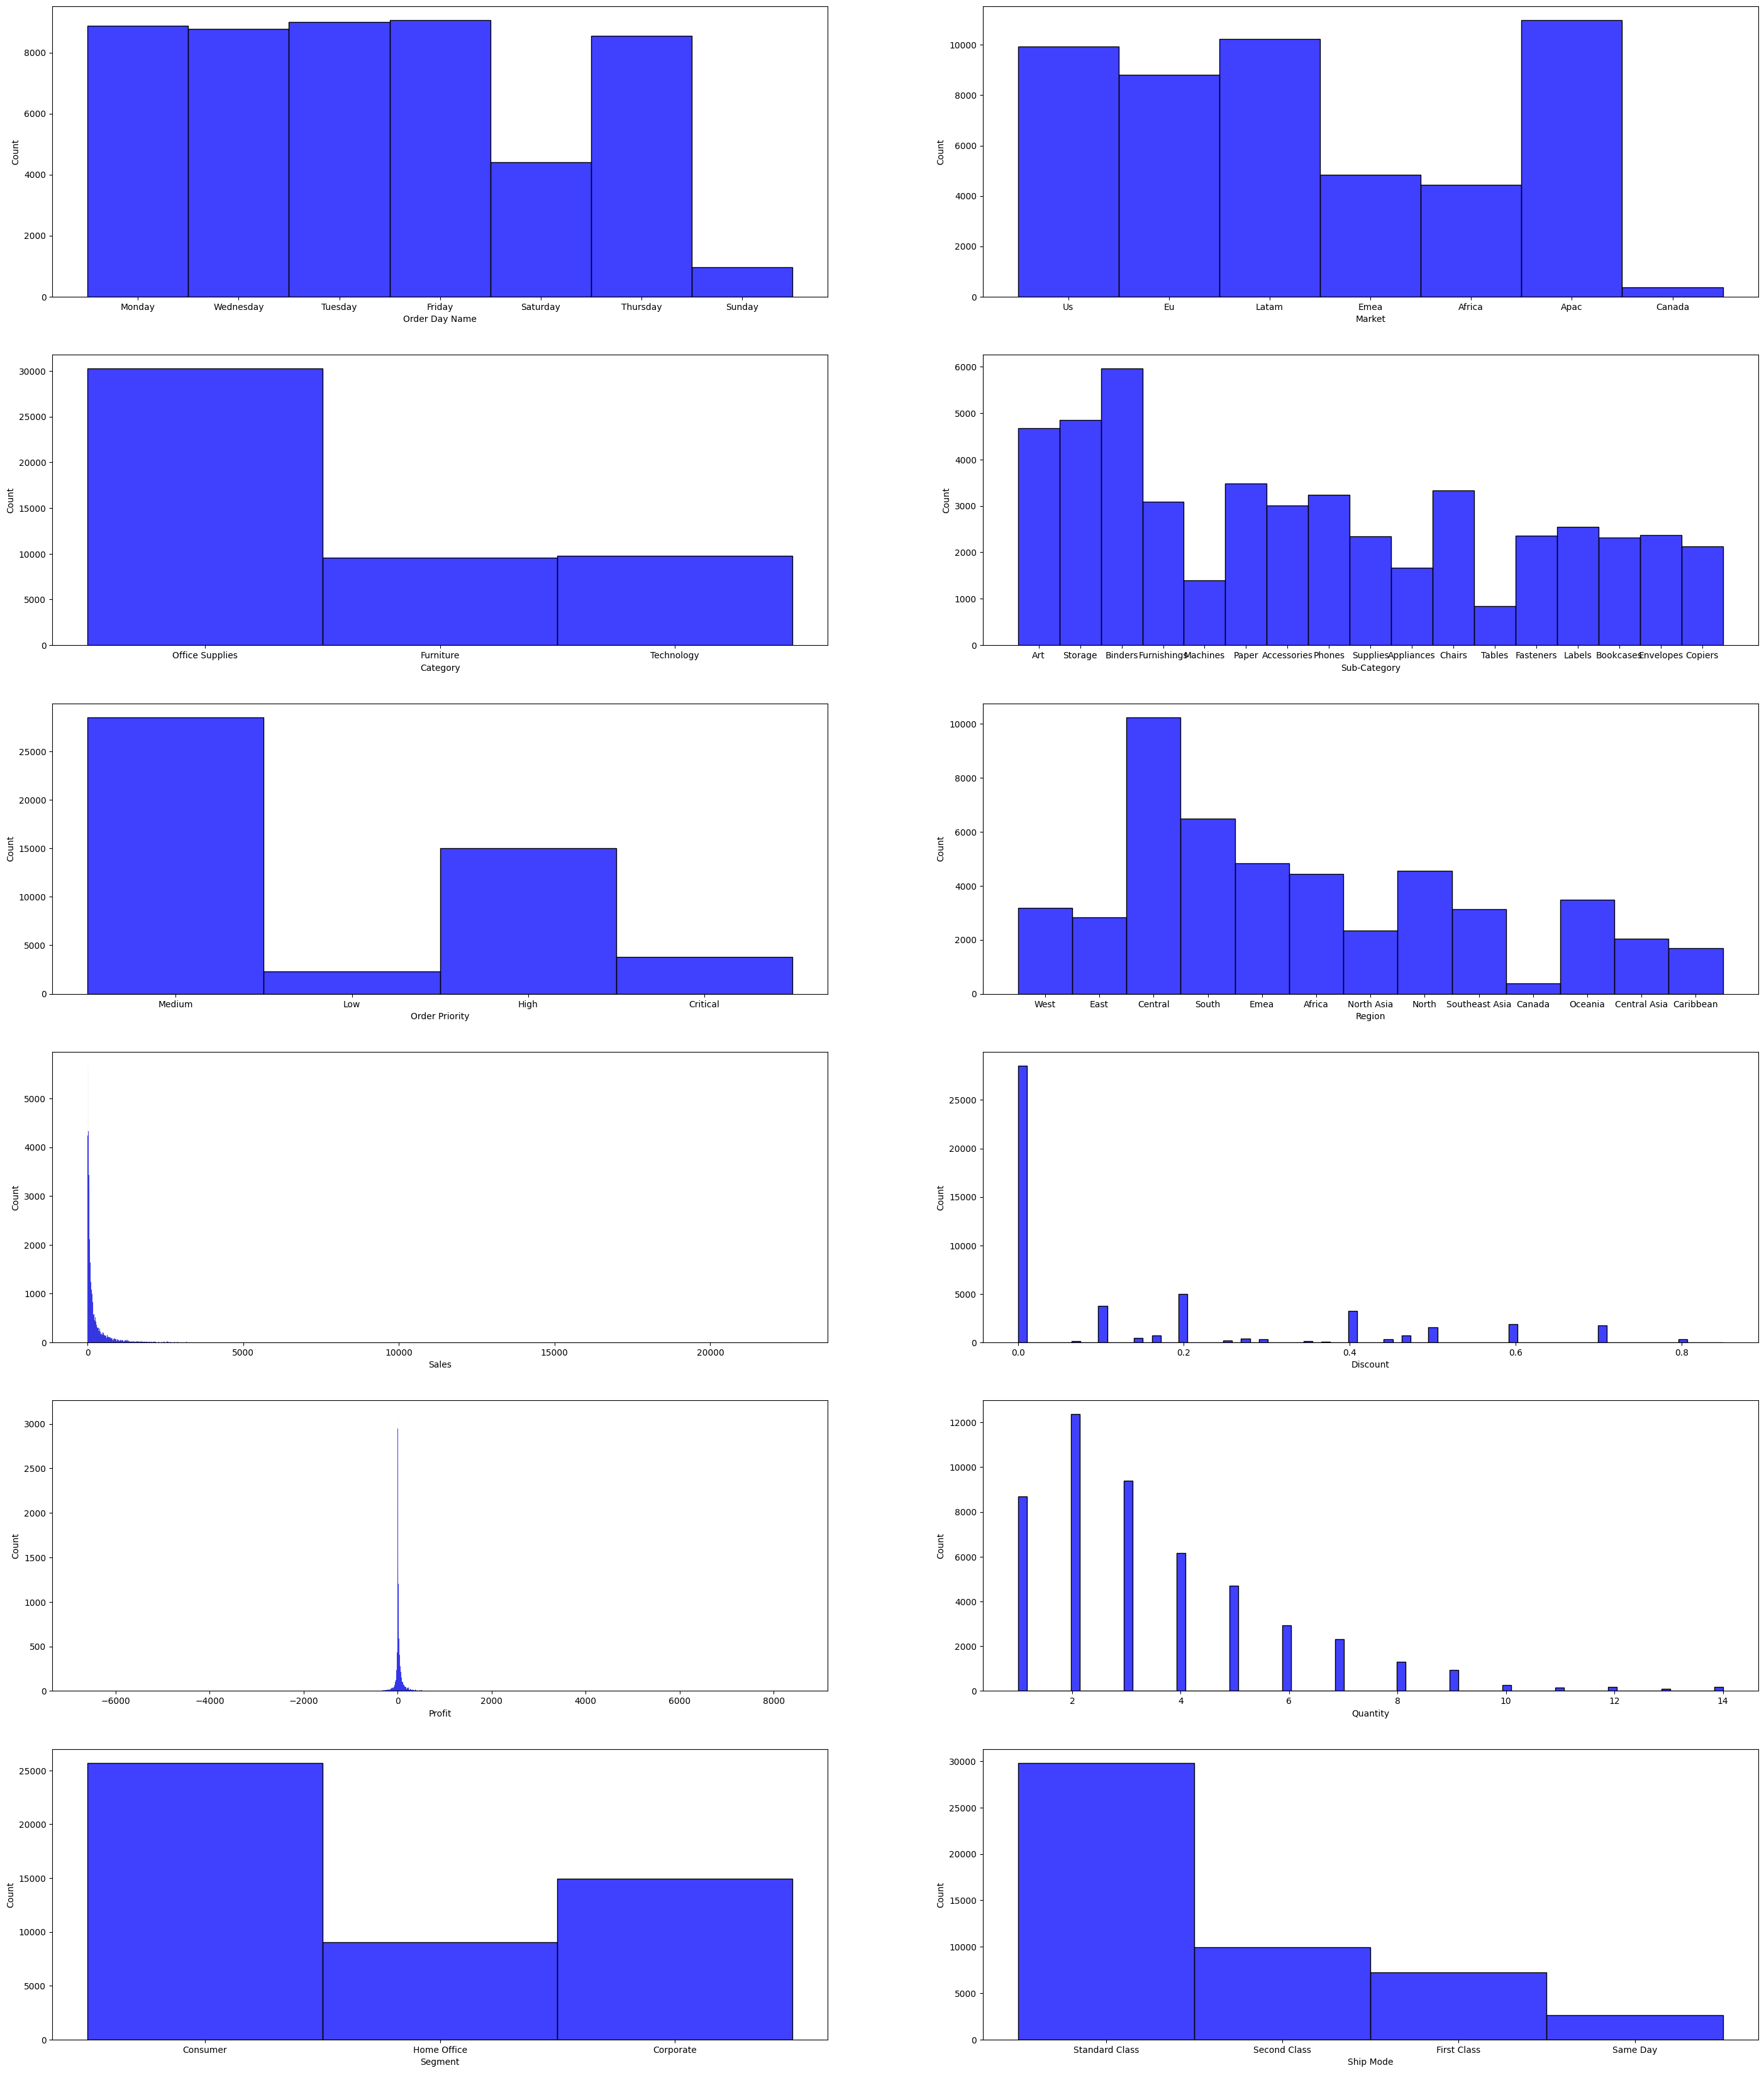

In [63]:
fig , axes = plt.subplots(6, 2, figsize=(35, 42))

axes = axes.flatten()
for i , feature in enumerate(['Order Day Name', 'Market', 'Category', 'Sub-Category',
       'Order Priority', 'Region', 'Sales',
       'Discount','Profit','Quantity','Segment','Ship Mode']):
    sns.histplot(selected_dataframe, x=feature, ax=axes[i], color="blue")
plt.savefig('histplots_output.png', dpi=300, bbox_inches='tight')

In [64]:
selected_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49635 entries, 0 to 49634
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          49635 non-null  object 
 1   Order Day Name    49635 non-null  object 
 2   Order Day Number  49635 non-null  int32  
 3   Market            49635 non-null  object 
 4   Category          49635 non-null  object 
 5   Sub-Category      49635 non-null  object 
 6   Order Priority    49635 non-null  object 
 7   Region            49635 non-null  object 
 8   Sales             49635 non-null  float64
 9   Discount          49635 non-null  float64
 10  Profit            49635 non-null  float64
 11  Quantity          49635 non-null  int64  
 12  Segment           49635 non-null  object 
 13  Ship Mode         49635 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 5.1+ MB


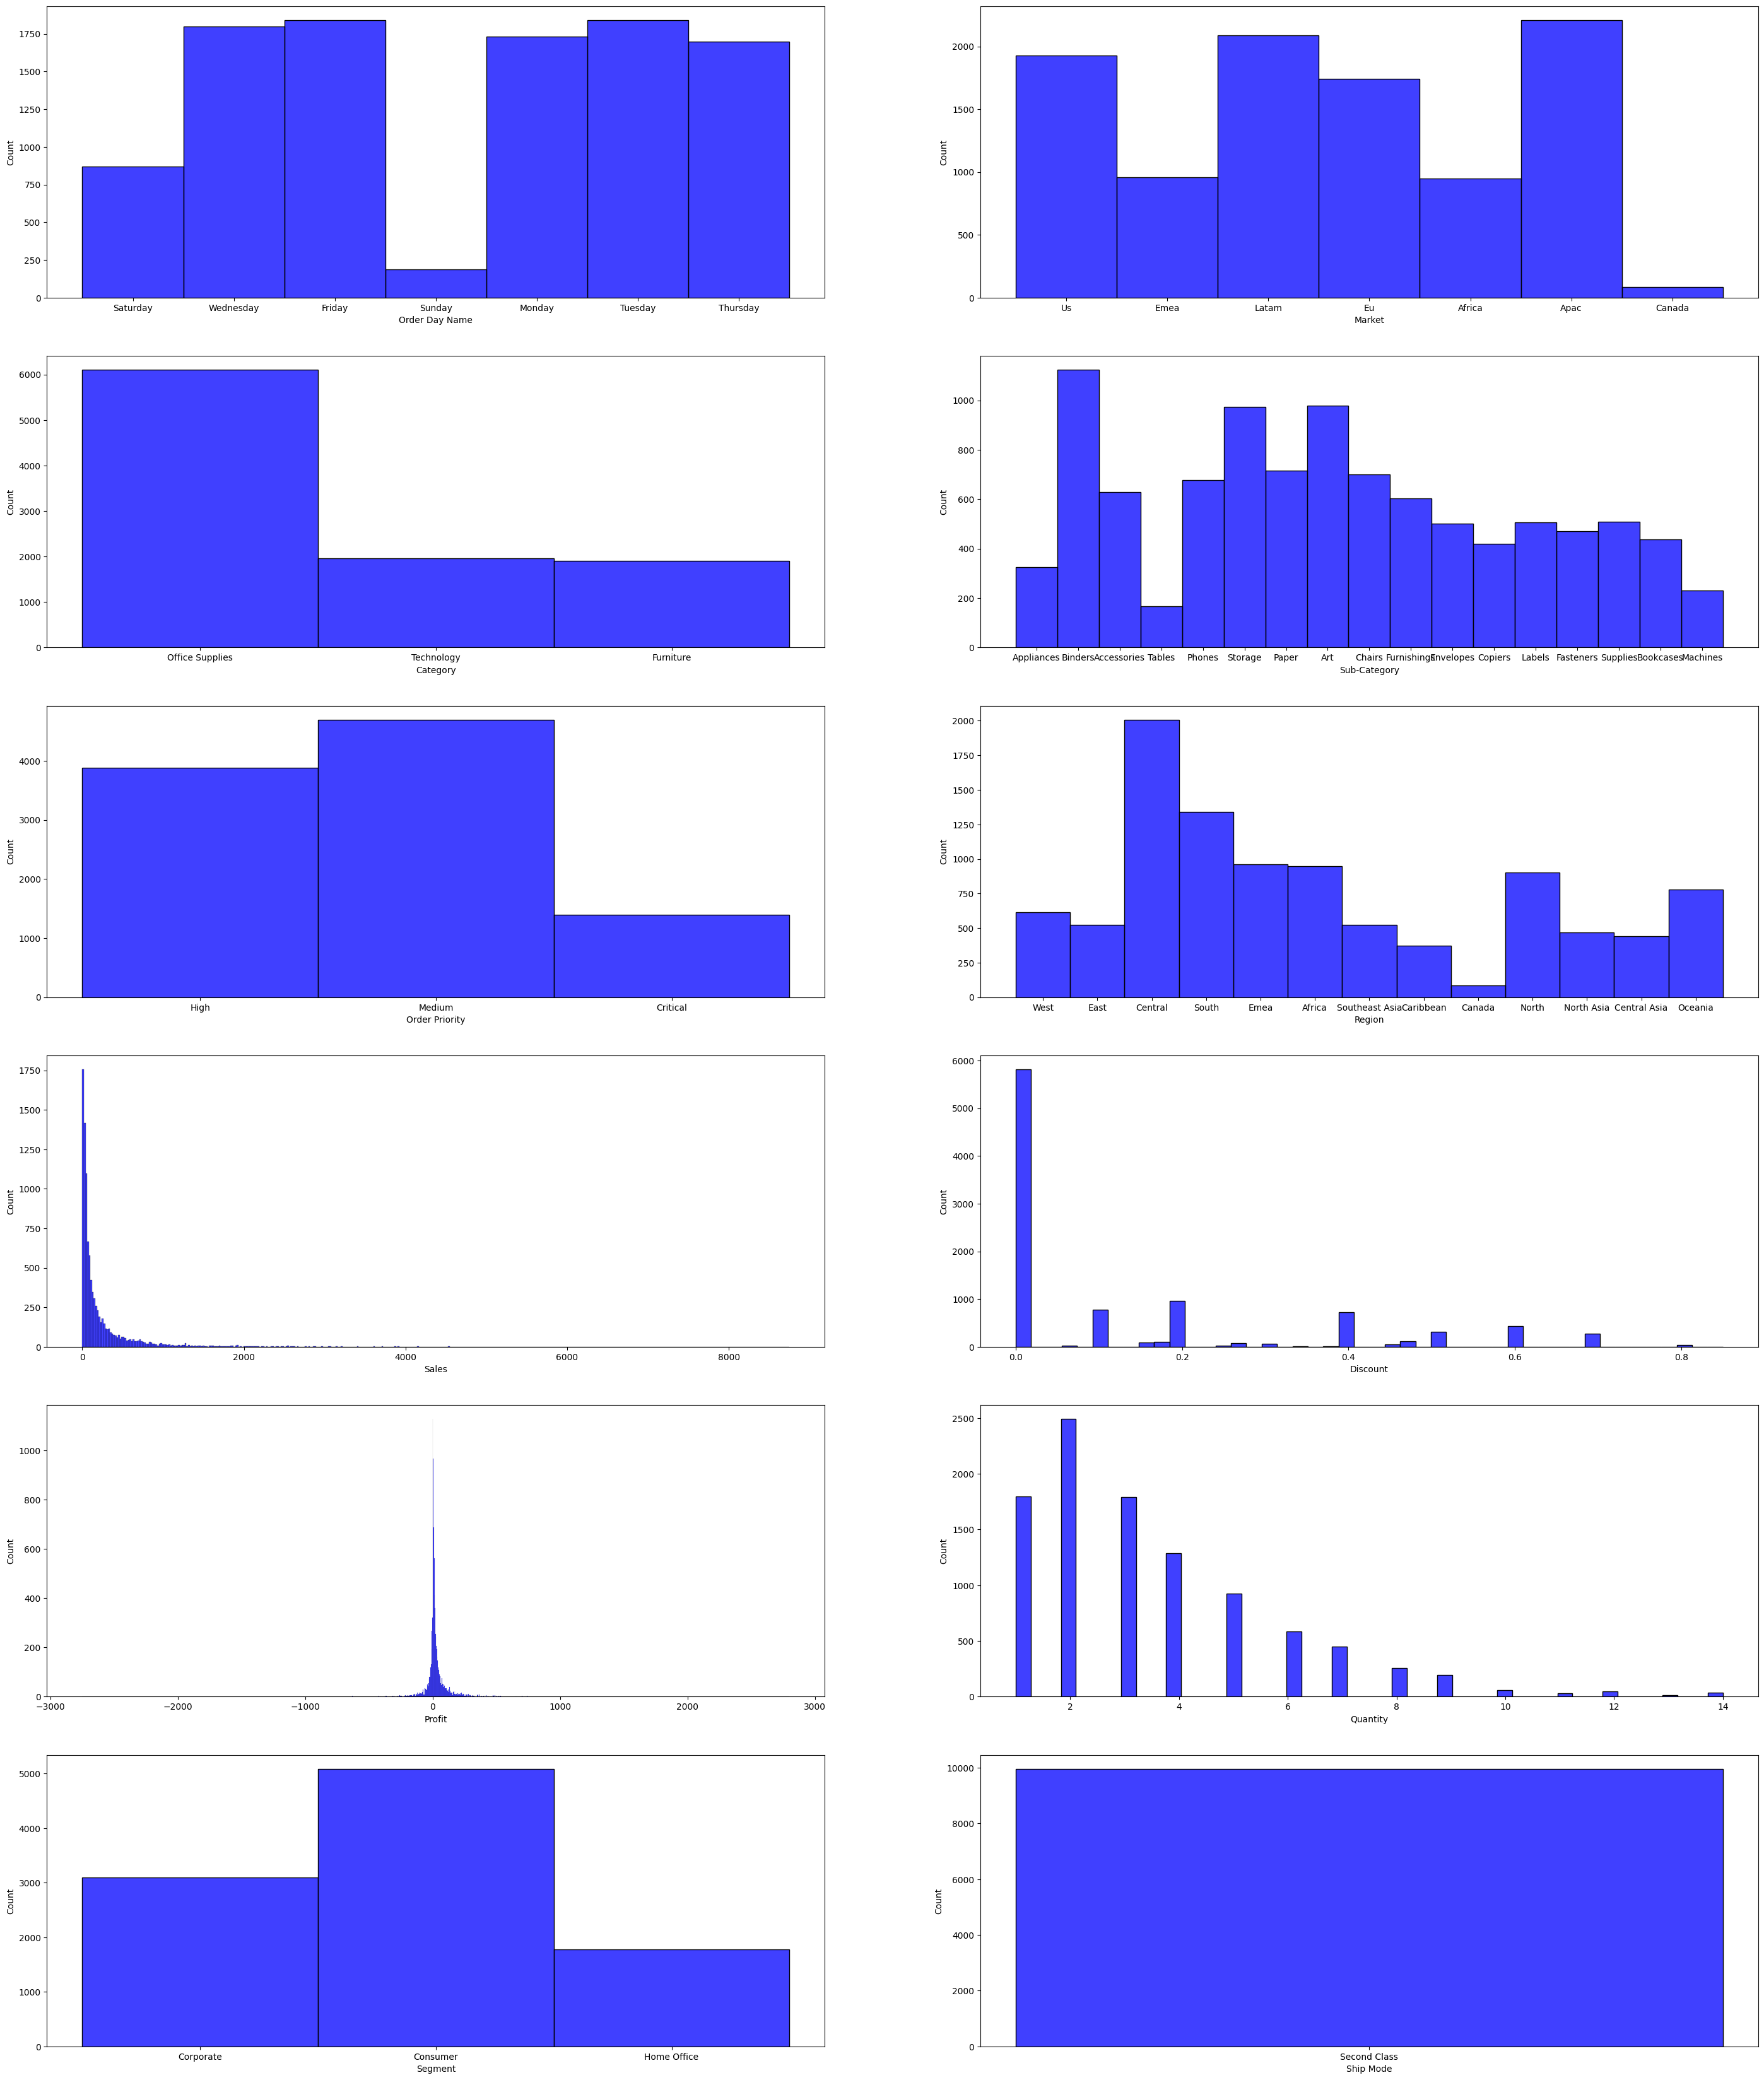

In [65]:
fig , axes = plt.subplots(6, 2, figsize=(35, 42))

axes = axes.flatten()
for i , feature in enumerate(['Order Day Name', 'Market', 'Category', 'Sub-Category',
       'Order Priority', 'Region', 'Sales',
       'Discount','Profit','Quantity','Segment','Ship Mode']):
    sns.histplot(selected_dataframe[selected_dataframe["Ship Mode"] == "Second Class"], x=feature, ax=axes[i], color="blue")

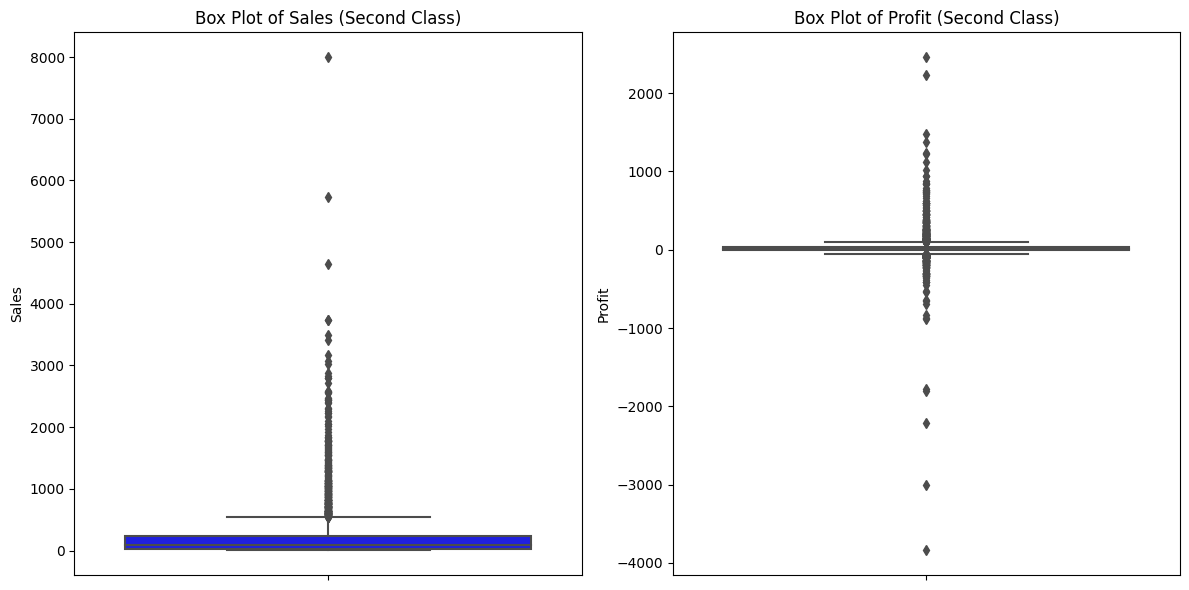

In [66]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#Filter DataFrame for Ship Mode
df_filtered = selected_dataframe[selected_dataframe["Ship Mode"] == "Same Day"]
features = ['Sales', 'Profit']

for i, feature in enumerate(features):
    sns.boxplot(data=df_filtered, y=feature, ax=axes[i], color="blue")
    axes[i].set_title(f'Box Plot of {feature} (Second Class)')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.savefig('boxplot_output.png', dpi=300, bbox_inches='tight')
plt.show()

In [67]:
selected_dataframe['selected'] = 0
selected_dataframe.loc[(selected_dataframe["Sales"] < 2000) & (selected_dataframe["Profit"] < 1000) & (selected_dataframe["Profit"] > -1000) & (selected_dataframe["Ship Mode"] == "Standard Class"),'selected'] = 1
selected_dataframe.loc[(selected_dataframe["Sales"] < 2000) & (selected_dataframe["Profit"] < 1000) & (selected_dataframe["Profit"] > -1000) & (selected_dataframe["Ship Mode"] == "Second Class"),'selected'] = 1
selected_dataframe.loc[(selected_dataframe["Sales"] < 2000) & (selected_dataframe["Profit"] < 1000) & (selected_dataframe["Profit"] > -1000) & (selected_dataframe["Ship Mode"] == "First Class"),'selected'] = 1
selected_dataframe.loc[(selected_dataframe["Sales"] < 2000) & (selected_dataframe["Profit"] < 1000) & (selected_dataframe["Profit"] > -1000) & (selected_dataframe["Ship Mode"] == "Same Day"),'selected'] = 1

In [68]:
selected_dataframe

,Order ID,Order Day Name,Order Day Number,Market,Category,Sub-Category,Order Priority,Region,Sales,Discount,Profit,Quantity,Segment,Ship Mode,selected
0,CA-2012-115945,Monday,0,Us,Office Supplies,Art,Medium,West,20.960,0.0,5.2400,2,Consumer,Standard Class,1
1,CA-2012-115945,Monday,0,Us,Office Supplies,Storage,Medium,West,304.230,0.0,9.1269,3,Consumer,Standard Class,1
2,CA-2012-115945,Monday,0,Us,Office Supplies,Binders,Medium,West,88.752,0.2,27.7350,3,Consumer,Standard Class,1
3,CA-2011-101462,Wednesday,2,Us,Furniture,Furnishings,Medium,West,59.920,0.0,27.5632,4,Consumer,Standard Class,1
4,CA-2011-107139,Tuesday,1,Us,Office Supplies,Binders,Medium,West,180.960,0.2,67.8600,6,Home Office,Standard Class,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,MX-2012-125262,Thursday,3,Latam,Technology,Accessories,High,Central,650.720,0.0,299.2800,4,Consumer,Standard Class,1
49631,MX-2013-160248,Wednesday,2,Latam,Furniture,Bookcases,Medium,Central,199.280,0.0,89.6400,2,Corporate,Standard Class,1
49632,MX-2013-160248,Wednesday,2,Latam,Furniture,Chairs,Medium,Central,180.600,0.0,7.2000,6,Corporate,Standard Class,1
49633,MX-2014-121993,Wednesday,2,Latam,Technology,Phones,High,Central,346.920,0.0,0.0000,3,Consumer,Standard Class,1


In [69]:
selected_dataframe[selected_dataframe["selected"] == 1]

,Order ID,Order Day Name,Order Day Number,Market,Category,Sub-Category,Order Priority,Region,Sales,Discount,Profit,Quantity,Segment,Ship Mode,selected
0,CA-2012-115945,Monday,0,Us,Office Supplies,Art,Medium,West,20.960,0.0,5.2400,2,Consumer,Standard Class,1
1,CA-2012-115945,Monday,0,Us,Office Supplies,Storage,Medium,West,304.230,0.0,9.1269,3,Consumer,Standard Class,1
2,CA-2012-115945,Monday,0,Us,Office Supplies,Binders,Medium,West,88.752,0.2,27.7350,3,Consumer,Standard Class,1
3,CA-2011-101462,Wednesday,2,Us,Furniture,Furnishings,Medium,West,59.920,0.0,27.5632,4,Consumer,Standard Class,1
4,CA-2011-107139,Tuesday,1,Us,Office Supplies,Binders,Medium,West,180.960,0.2,67.8600,6,Home Office,Standard Class,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,MX-2012-125262,Thursday,3,Latam,Technology,Accessories,High,Central,650.720,0.0,299.2800,4,Consumer,Standard Class,1
49631,MX-2013-160248,Wednesday,2,Latam,Furniture,Bookcases,Medium,Central,199.280,0.0,89.6400,2,Corporate,Standard Class,1
49632,MX-2013-160248,Wednesday,2,Latam,Furniture,Chairs,Medium,Central,180.600,0.0,7.2000,6,Corporate,Standard Class,1
49633,MX-2014-121993,Wednesday,2,Latam,Technology,Phones,High,Central,346.920,0.0,0.0000,3,Consumer,Standard Class,1


In [70]:
selected_dataframe = selected_dataframe[selected_dataframe["selected"] == 1]
selected_dataframe = selected_dataframe.drop(columns=['selected'])

In [71]:
selected_dataframe = selected_dataframe.drop(columns=['Order Day Name'])

In [72]:
selected_dataframe

,Order ID,Order Day Number,Market,Category,Sub-Category,Order Priority,Region,Sales,Discount,Profit,Quantity,Segment,Ship Mode
0,CA-2012-115945,0,Us,Office Supplies,Art,Medium,West,20.960,0.0,5.2400,2,Consumer,Standard Class
1,CA-2012-115945,0,Us,Office Supplies,Storage,Medium,West,304.230,0.0,9.1269,3,Consumer,Standard Class
2,CA-2012-115945,0,Us,Office Supplies,Binders,Medium,West,88.752,0.2,27.7350,3,Consumer,Standard Class
3,CA-2011-101462,2,Us,Furniture,Furnishings,Medium,West,59.920,0.0,27.5632,4,Consumer,Standard Class
4,CA-2011-107139,1,Us,Office Supplies,Binders,Medium,West,180.960,0.2,67.8600,6,Home Office,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,MX-2012-125262,3,Latam,Technology,Accessories,High,Central,650.720,0.0,299.2800,4,Consumer,Standard Class
49631,MX-2013-160248,2,Latam,Furniture,Bookcases,Medium,Central,199.280,0.0,89.6400,2,Corporate,Standard Class
49632,MX-2013-160248,2,Latam,Furniture,Chairs,Medium,Central,180.600,0.0,7.2000,6,Corporate,Standard Class
49633,MX-2014-121993,2,Latam,Technology,Phones,High,Central,346.920,0.0,0.0000,3,Consumer,Standard Class


In [73]:
def Encode_order_priority(order):
    if order == "Low":
        return 1
    elif order == "Medium":
        return 2
    elif order == "High":
        return 3
    elif order == "Critical":
        return 4

In [74]:
def Encode_order_shipmode(order):
    if order == "Standard Class":
        return 1
    elif order == "Second Class":
        return 2
    elif order == "First Class":
        return 3
    elif order == "Same Day":
        return 4

In [75]:
selected_dataframe["Order Priority"] = selected_dataframe["Order Priority"].apply(lambda x:Encode_order_priority(x))

In [76]:
selected_dataframe

,Order ID,Order Day Number,Market,Category,Sub-Category,Order Priority,Region,Sales,Discount,Profit,Quantity,Segment,Ship Mode
0,CA-2012-115945,0,Us,Office Supplies,Art,2,West,20.960,0.0,5.2400,2,Consumer,Standard Class
1,CA-2012-115945,0,Us,Office Supplies,Storage,2,West,304.230,0.0,9.1269,3,Consumer,Standard Class
2,CA-2012-115945,0,Us,Office Supplies,Binders,2,West,88.752,0.2,27.7350,3,Consumer,Standard Class
3,CA-2011-101462,2,Us,Furniture,Furnishings,2,West,59.920,0.0,27.5632,4,Consumer,Standard Class
4,CA-2011-107139,1,Us,Office Supplies,Binders,2,West,180.960,0.2,67.8600,6,Home Office,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,MX-2012-125262,3,Latam,Technology,Accessories,3,Central,650.720,0.0,299.2800,4,Consumer,Standard Class
49631,MX-2013-160248,2,Latam,Furniture,Bookcases,2,Central,199.280,0.0,89.6400,2,Corporate,Standard Class
49632,MX-2013-160248,2,Latam,Furniture,Chairs,2,Central,180.600,0.0,7.2000,6,Corporate,Standard Class
49633,MX-2014-121993,2,Latam,Technology,Phones,3,Central,346.920,0.0,0.0000,3,Consumer,Standard Class


In [77]:
selected_dataframe[(selected_dataframe["Discount"] > 0) & (selected_dataframe["Profit"] < 0)]

,Order ID,Order Day Number,Market,Category,Sub-Category,Order Priority,Region,Sales,Discount,Profit,Quantity,Segment,Ship Mode
15,CA-2014-108574,2,Us,Technology,Phones,2,West,128.744,0.2,-28.9674,7,Consumer,Standard Class
20,CA-2013-129868,4,Us,Furniture,Chairs,2,West,146.352,0.2,-5.4882,3,Corporate,Standard Class
23,US-2014-163657,2,Us,Furniture,Tables,3,West,236.528,0.2,-2.9566,2,Consumer,Standard Class
54,CA-2012-131597,4,Us,Furniture,Tables,2,West,170.136,0.2,-8.5068,3,Corporate,Standard Class
60,CA-2014-128965,4,Us,Furniture,Chairs,2,West,218.352,0.2,-19.1058,3,Consumer,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49234,US-2014-107391,4,Latam,Office Supplies,Art,2,Central,43.104,0.4,-22.3360,4,Corporate,Standard Class
49235,US-2014-135685,3,Latam,Office Supplies,Paper,2,Central,38.220,0.4,-21.7000,7,Corporate,Standard Class
49236,US-2014-135685,3,Latam,Office Supplies,Supplies,2,Central,34.416,0.4,-8.0640,3,Corporate,Standard Class
49238,MX-2014-110310,2,Latam,Furniture,Bookcases,2,Central,67.320,0.4,-35.9200,1,Consumer,Standard Class


In [78]:
selected_dataframe[(selected_dataframe["Discount"] > 0) & (selected_dataframe["Profit"] < 0) & (selected_dataframe["Ship Mode"] == 3)]

,Order ID,Order Day Number,Market,Category,Sub-Category,Order Priority,Region,Sales,Discount,Profit,Quantity,Segment,Ship Mode


In [79]:
selected_dataframe["Ship Mode"] = selected_dataframe["Ship Mode"].apply(lambda x:Encode_order_shipmode(x))

In [80]:
selected_dataframe

,Order ID,Order Day Number,Market,Category,Sub-Category,Order Priority,Region,Sales,Discount,Profit,Quantity,Segment,Ship Mode
0,CA-2012-115945,0,Us,Office Supplies,Art,2,West,20.960,0.0,5.2400,2,Consumer,1
1,CA-2012-115945,0,Us,Office Supplies,Storage,2,West,304.230,0.0,9.1269,3,Consumer,1
2,CA-2012-115945,0,Us,Office Supplies,Binders,2,West,88.752,0.2,27.7350,3,Consumer,1
3,CA-2011-101462,2,Us,Furniture,Furnishings,2,West,59.920,0.0,27.5632,4,Consumer,1
4,CA-2011-107139,1,Us,Office Supplies,Binders,2,West,180.960,0.2,67.8600,6,Home Office,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,MX-2012-125262,3,Latam,Technology,Accessories,3,Central,650.720,0.0,299.2800,4,Consumer,1
49631,MX-2013-160248,2,Latam,Furniture,Bookcases,2,Central,199.280,0.0,89.6400,2,Corporate,1
49632,MX-2013-160248,2,Latam,Furniture,Chairs,2,Central,180.600,0.0,7.2000,6,Corporate,1
49633,MX-2014-121993,2,Latam,Technology,Phones,3,Central,346.920,0.0,0.0000,3,Consumer,1


In [81]:
selected_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48904 entries, 0 to 49634
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          48904 non-null  object 
 1   Order Day Number  48904 non-null  int32  
 2   Market            48904 non-null  object 
 3   Category          48904 non-null  object 
 4   Sub-Category      48904 non-null  object 
 5   Order Priority    48904 non-null  int64  
 6   Region            48904 non-null  object 
 7   Sales             48904 non-null  float64
 8   Discount          48904 non-null  float64
 9   Profit            48904 non-null  float64
 10  Quantity          48904 non-null  int64  
 11  Segment           48904 non-null  object 
 12  Ship Mode         48904 non-null  int64  
dtypes: float64(3), int32(1), int64(3), object(6)
memory usage: 5.0+ MB


In [82]:
selected_dataframe.describe()

,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Ship Mode
count,48904.000000,48904.000000,48904.000000,48904.000000,48904.000000,48904.000000,48904.000000
mean,2.342958,2.407451,203.682262,0.143381,22.656523,3.419577,1.649947
std,1.670969,0.698050,305.491089,0.212311,106.769752,2.232126,0.914012
min,0.000000,1.000000,0.444000,0.000000,-996.780000,1.000000,1.000000
25%,1.000000,2.000000,29.910000,0.000000,0.000000,2.000000,1.000000
50%,2.000000,2.000000,81.424000,0.000000,8.940000,3.000000,1.000000
75%,4.000000,3.000000,235.945500,0.200000,34.740000,5.000000,2.000000
max,6.000000,4.000000,1999.960000,0.800000,939.260000,14.000000,4.000000


In [83]:
#selected_dataframe = selected_dataframe[selected_dataframe["Ship Mode"].isin([1,2,3])]

In [84]:
#selected_dataframe

In [85]:
selected_dataframe_with_encoding = pd.get_dummies(selected_dataframe,columns=['Market','Category','Sub-Category','Region','Segment'], prefix=['Market','Category','Sub-Cat','Region','Segment'],dtype=int)

In [86]:
selected_dataframe_with_encoding

,Order ID,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Ship Mode,Market_Africa,Market_Apac,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
0,CA-2012-115945,0,2,20.960,0.0,5.2400,2,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,CA-2012-115945,0,2,304.230,0.0,9.1269,3,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,CA-2012-115945,0,2,88.752,0.2,27.7350,3,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,CA-2011-101462,2,2,59.920,0.0,27.5632,4,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,CA-2011-107139,1,2,180.960,0.2,67.8600,6,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49630,MX-2012-125262,3,3,650.720,0.0,299.2800,4,1,0,0,...,0,0,0,0,0,0,0,1,0,0
49631,MX-2013-160248,2,2,199.280,0.0,89.6400,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49632,MX-2013-160248,2,2,180.600,0.0,7.2000,6,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49633,MX-2014-121993,2,3,346.920,0.0,0.0000,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
selected_dataframe_with_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48904 entries, 0 to 49634
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order ID                  48904 non-null  object 
 1   Order Day Number          48904 non-null  int32  
 2   Order Priority            48904 non-null  int64  
 3   Sales                     48904 non-null  float64
 4   Discount                  48904 non-null  float64
 5   Profit                    48904 non-null  float64
 6   Quantity                  48904 non-null  int64  
 7   Ship Mode                 48904 non-null  int64  
 8   Market_Africa             48904 non-null  int64  
 9   Market_Apac               48904 non-null  int64  
 10  Market_Canada             48904 non-null  int64  
 11  Market_Emea               48904 non-null  int64  
 12  Market_Eu                 48904 non-null  int64  
 13  Market_Latam              48904 non-null  int64  
 14  Market_Us  

In [88]:
unique_ids = selected_dataframe_with_encoding["Order ID"].unique()

In [89]:
train_ids, test_ids = train_test_split(unique_ids, test_size=0.3, random_state=42)

In [90]:
train_data = selected_dataframe_with_encoding[selected_dataframe_with_encoding["Order ID"].isin(train_ids)]
test_data = selected_dataframe_with_encoding[selected_dataframe_with_encoding["Order ID"].isin(test_ids)]

In [91]:
train_data["Ship Mode"].unique()

array([1, 2, 3, 4])

In [92]:
train_data[train_data["Ship Mode"] == 1]

,Order ID,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Ship Mode,Market_Africa,Market_Apac,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
0,CA-2012-115945,0,2,20.960,0.0,5.2400,2,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,CA-2012-115945,0,2,304.230,0.0,9.1269,3,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,CA-2012-115945,0,2,88.752,0.2,27.7350,3,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,CA-2011-101462,2,2,59.920,0.0,27.5632,4,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,CA-2011-107139,1,2,180.960,0.2,67.8600,6,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49627,MX-2014-112431,2,2,126.420,0.0,18.9000,7,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49628,MX-2014-112431,2,2,67.340,0.0,18.0600,7,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49629,MX-2014-112431,2,2,169.760,0.0,74.5600,8,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49630,MX-2012-125262,3,3,650.720,0.0,299.2800,4,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [93]:
train_data[train_data["Ship Mode"] == 2]

,Order ID,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Ship Mode,Market_Africa,Market_Apac,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
446,CA-2013-126102,2,3,276.784,0.2,89.9548,2,2,0,0,...,0,0,0,0,0,0,1,1,0,0
447,CA-2013-121755,2,2,90.570,0.0,11.7741,3,2,0,0,...,0,0,0,0,0,0,1,1,0,0
448,CA-2013-121755,2,2,11.648,0.2,4.2224,2,2,0,0,...,0,0,0,0,0,0,1,1,0,0
449,CA-2012-106257,4,2,241.568,0.2,-15.0980,2,2,0,0,...,0,0,0,0,0,0,1,1,0,0
450,CA-2012-106257,4,2,479.920,0.2,41.9930,2,2,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25748,MX-2013-103639,2,3,23.100,0.0,1.3800,3,2,0,0,...,0,0,0,0,0,0,0,1,0,0
25749,MX-2013-103639,2,3,89.400,0.0,26.8200,3,2,0,0,...,0,0,0,0,0,0,0,1,0,0
25750,MX-2013-103639,2,3,190.080,0.0,45.6000,12,2,0,0,...,0,0,0,0,0,0,0,1,0,0
25751,IT-2012-3986604,3,4,107.820,0.5,-58.2600,4,2,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
train_data[train_data["Ship Mode"] == 3]

,Order ID,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Ship Mode,Market_Africa,Market_Apac,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
604,CA-2011-138737,2,2,8.640,0.0,2.4192,3,3,0,0,...,0,0,0,0,0,0,1,1,0,0
605,CA-2012-157959,4,2,136.920,0.0,41.0760,4,3,0,0,...,0,0,0,0,0,0,1,0,1,0
610,US-2011-128685,0,2,7.184,0.2,2.2450,2,3,0,0,...,0,0,0,0,0,0,1,0,1,0
614,CA-2013-123512,1,4,219.840,0.0,107.7220,4,3,0,0,...,0,0,0,0,0,0,1,1,0,0
615,CA-2013-123512,1,4,22.500,0.0,10.8000,6,3,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17711,ES-2012-1091172,2,3,13.620,0.5,-0.6000,2,3,0,0,...,0,0,0,0,0,0,0,0,1,0
17712,IT-2014-5624384,4,3,73.440,0.5,-25.0200,3,3,0,0,...,0,0,0,0,0,0,0,0,1,0
17713,IT-2014-5624384,4,3,67.815,0.5,-27.1350,3,3,0,0,...,0,0,0,0,0,0,0,0,1,0
17714,MX-2012-129651,4,2,21.900,0.0,8.2800,3,3,0,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
train_data

,Order ID,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Ship Mode,Market_Africa,Market_Apac,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
0,CA-2012-115945,0,2,20.960,0.0,5.2400,2,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,CA-2012-115945,0,2,304.230,0.0,9.1269,3,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,CA-2012-115945,0,2,88.752,0.2,27.7350,3,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,CA-2011-101462,2,2,59.920,0.0,27.5632,4,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,CA-2011-107139,1,2,180.960,0.2,67.8600,6,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49627,MX-2014-112431,2,2,126.420,0.0,18.9000,7,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49628,MX-2014-112431,2,2,67.340,0.0,18.0600,7,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49629,MX-2014-112431,2,2,169.760,0.0,74.5600,8,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49630,MX-2012-125262,3,3,650.720,0.0,299.2800,4,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [96]:
X_train = train_data.drop(columns=['Ship Mode', 'Order ID'])
y_train = train_data[['Ship Mode']]
X_test = test_data.drop(columns=['Ship Mode', 'Order ID'])
y_test = test_data['Ship Mode']

In [97]:
X_train

,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Market_Africa,Market_Apac,Market_Canada,Market_Emea,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
0,0,2,20.960,0.0,5.2400,2,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,2,304.230,0.0,9.1269,3,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,2,88.752,0.2,27.7350,3,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2,2,59.920,0.0,27.5632,4,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,2,180.960,0.2,67.8600,6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49627,2,2,126.420,0.0,18.9000,7,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49628,2,2,67.340,0.0,18.0600,7,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49629,2,2,169.760,0.0,74.5600,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49630,3,3,650.720,0.0,299.2800,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
#selected_dataframe = X_train.drop(columns=['Order Day Name'])

In [99]:
smote = SMOTE(sampling_strategy={2:8000 , 3:8000 , 4:8000}, k_neighbors=5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(sampling_strategy='majority', replacement=False, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_smote, y_train_smote)


In [100]:
X_train_resampled_scaled = X_train_resampled.copy()

In [101]:
X_train_resampled_scaled

,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Market_Africa,Market_Apac,Market_Canada,Market_Emea,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
18526,3,2,31.518000,0.150000,12.168000,3,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
19114,3,2,93.228300,0.270000,25.458300,3,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
21912,1,2,473.850000,0.000000,160.920000,9,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
23561,4,2,13.290000,0.000000,0.390000,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29963,1,2,656.991000,0.100000,-65.709000,3,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44683,0,4,93.079178,0.024423,2.593639,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
44684,2,3,32.138430,0.033511,6.879070,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
44685,3,3,343.412161,0.000000,115.358548,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44686,2,3,106.048917,0.047445,43.457508,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_test_scaled = X_test.copy()

In [103]:
y_train

,Ship Mode
0,1
1,1
2,1
3,1
4,1
...,...
49627,1
49628,1
49629,1
49630,1


In [104]:
scaler = RobustScaler()

scaler.fit(X_train_resampled[["Order Day Number","Order Priority","Sales","Discount","Profit","Quantity"]])

,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False


In [105]:
X_train_resampled_scaled[["Order Day Number","Order Priority","Sales","Discount","Profit","Quantity"]] = scaler.transform(X_train_resampled[["Order Day Number","Order Priority","Sales","Discount","Profit","Quantity"]])

In [106]:
X_test_scaled[["Order Day Number","Order Priority","Sales","Discount","Profit","Quantity"]] = scaler.transform(X_test[["Order Day Number","Order Priority","Sales","Discount","Profit","Quantity"]])

In [107]:
X_train_resampled_scaled

,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Market_Africa,Market_Apac,Market_Canada,Market_Emea,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
18526,0.5,-1.0,-0.247797,0.750000,0.098824,0.0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
19114,0.5,-1.0,0.064405,1.350000,0.487633,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
21912,-0.5,-1.0,1.990029,0.000000,4.450578,3.0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
23561,1.0,-1.0,-0.340016,0.000000,-0.245743,-1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29963,-0.5,-1.0,2.916568,0.500000,-2.179475,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44683,-1.0,1.0,0.063650,0.122115,-0.181275,-0.5,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
44684,0.0,0.0,-0.244659,0.167555,-0.055904,-0.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
44685,0.5,0.0,1.330124,0.000000,3.117673,0.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44686,0.0,0.0,0.129266,0.237225,1.014201,-0.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
X_test_scaled

,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Market_Africa,Market_Apac,Market_Canada,Market_Emea,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
5,1.0,-1.0,-0.307688,0.0,-0.067158,1.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
10,-1.0,0.0,-0.341685,0.0,-0.075162,-0.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32,0.5,0.0,0.627851,0.0,1.299102,-0.5,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
33,0.5,0.0,-0.374469,0.0,-0.166157,-1.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
34,0.5,0.0,-0.092674,0.0,0.234000,-1.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49614,0.0,-1.0,0.100687,0.0,-0.023112,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49616,0.5,-1.0,-0.278952,0.0,0.098590,0.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49631,0.0,-1.0,0.600937,0.0,2.365274,-0.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49632,0.0,-1.0,0.506432,0.0,-0.046516,1.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
X_train_resampled_scaled.describe()

,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Market_Africa,Market_Apac,Market_Canada,Market_Emea,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
count,32000.000000,32000.000000,3.200000e+04,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,...,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,0.100844,-0.409031,6.106197e-01,0.730092,0.422604,0.120875,0.069375,0.169500,0.005969,0.076719,...,0.076719,0.066344,0.034594,0.050438,0.093594,0.043812,0.047719,0.452125,0.234531,0.135281
std,0.799047,0.700974,1.541079e+00,1.063921,3.096834,1.051748,0.254095,0.375199,0.077028,0.266149,...,0.266149,0.248886,0.182751,0.218849,0.291267,0.204681,0.213174,0.497710,0.423712,0.342029
min,-1.000000,-2.000000,-4.044390e-01,0.000000,-29.313167,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.500000,-1.000000,-2.558500e-01,0.000000,-0.257152,-0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.594808e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,7.441500e-01,1.000000,0.742848,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,1.000000,9.646908e+00,4.000000,26.351528,5.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
X_train_resampled_scaled

,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Market_Africa,Market_Apac,Market_Canada,Market_Emea,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
18526,0.5,-1.0,-0.247797,0.750000,0.098824,0.0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
19114,0.5,-1.0,0.064405,1.350000,0.487633,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
21912,-0.5,-1.0,1.990029,0.000000,4.450578,3.0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
23561,1.0,-1.0,-0.340016,0.000000,-0.245743,-1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29963,-0.5,-1.0,2.916568,0.500000,-2.179475,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44683,-1.0,1.0,0.063650,0.122115,-0.181275,-0.5,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
44684,0.0,0.0,-0.244659,0.167555,-0.055904,-0.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
44685,0.5,0.0,1.330124,0.000000,3.117673,0.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44686,0.0,0.0,0.129266,0.237225,1.014201,-0.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
y_train_resampled

,Ship Mode
18526,1
19114,1
21912,1
23561,1
29963,1
...,...
44683,4
44684,4
44685,4
44686,4


In [112]:
y_train_resampled[y_train_resampled["Ship Mode"] == 2]

,Ship Mode
317,2
318,2
319,2
320,2
321,2
...,...
35478,2
35479,2
35480,2
35481,2


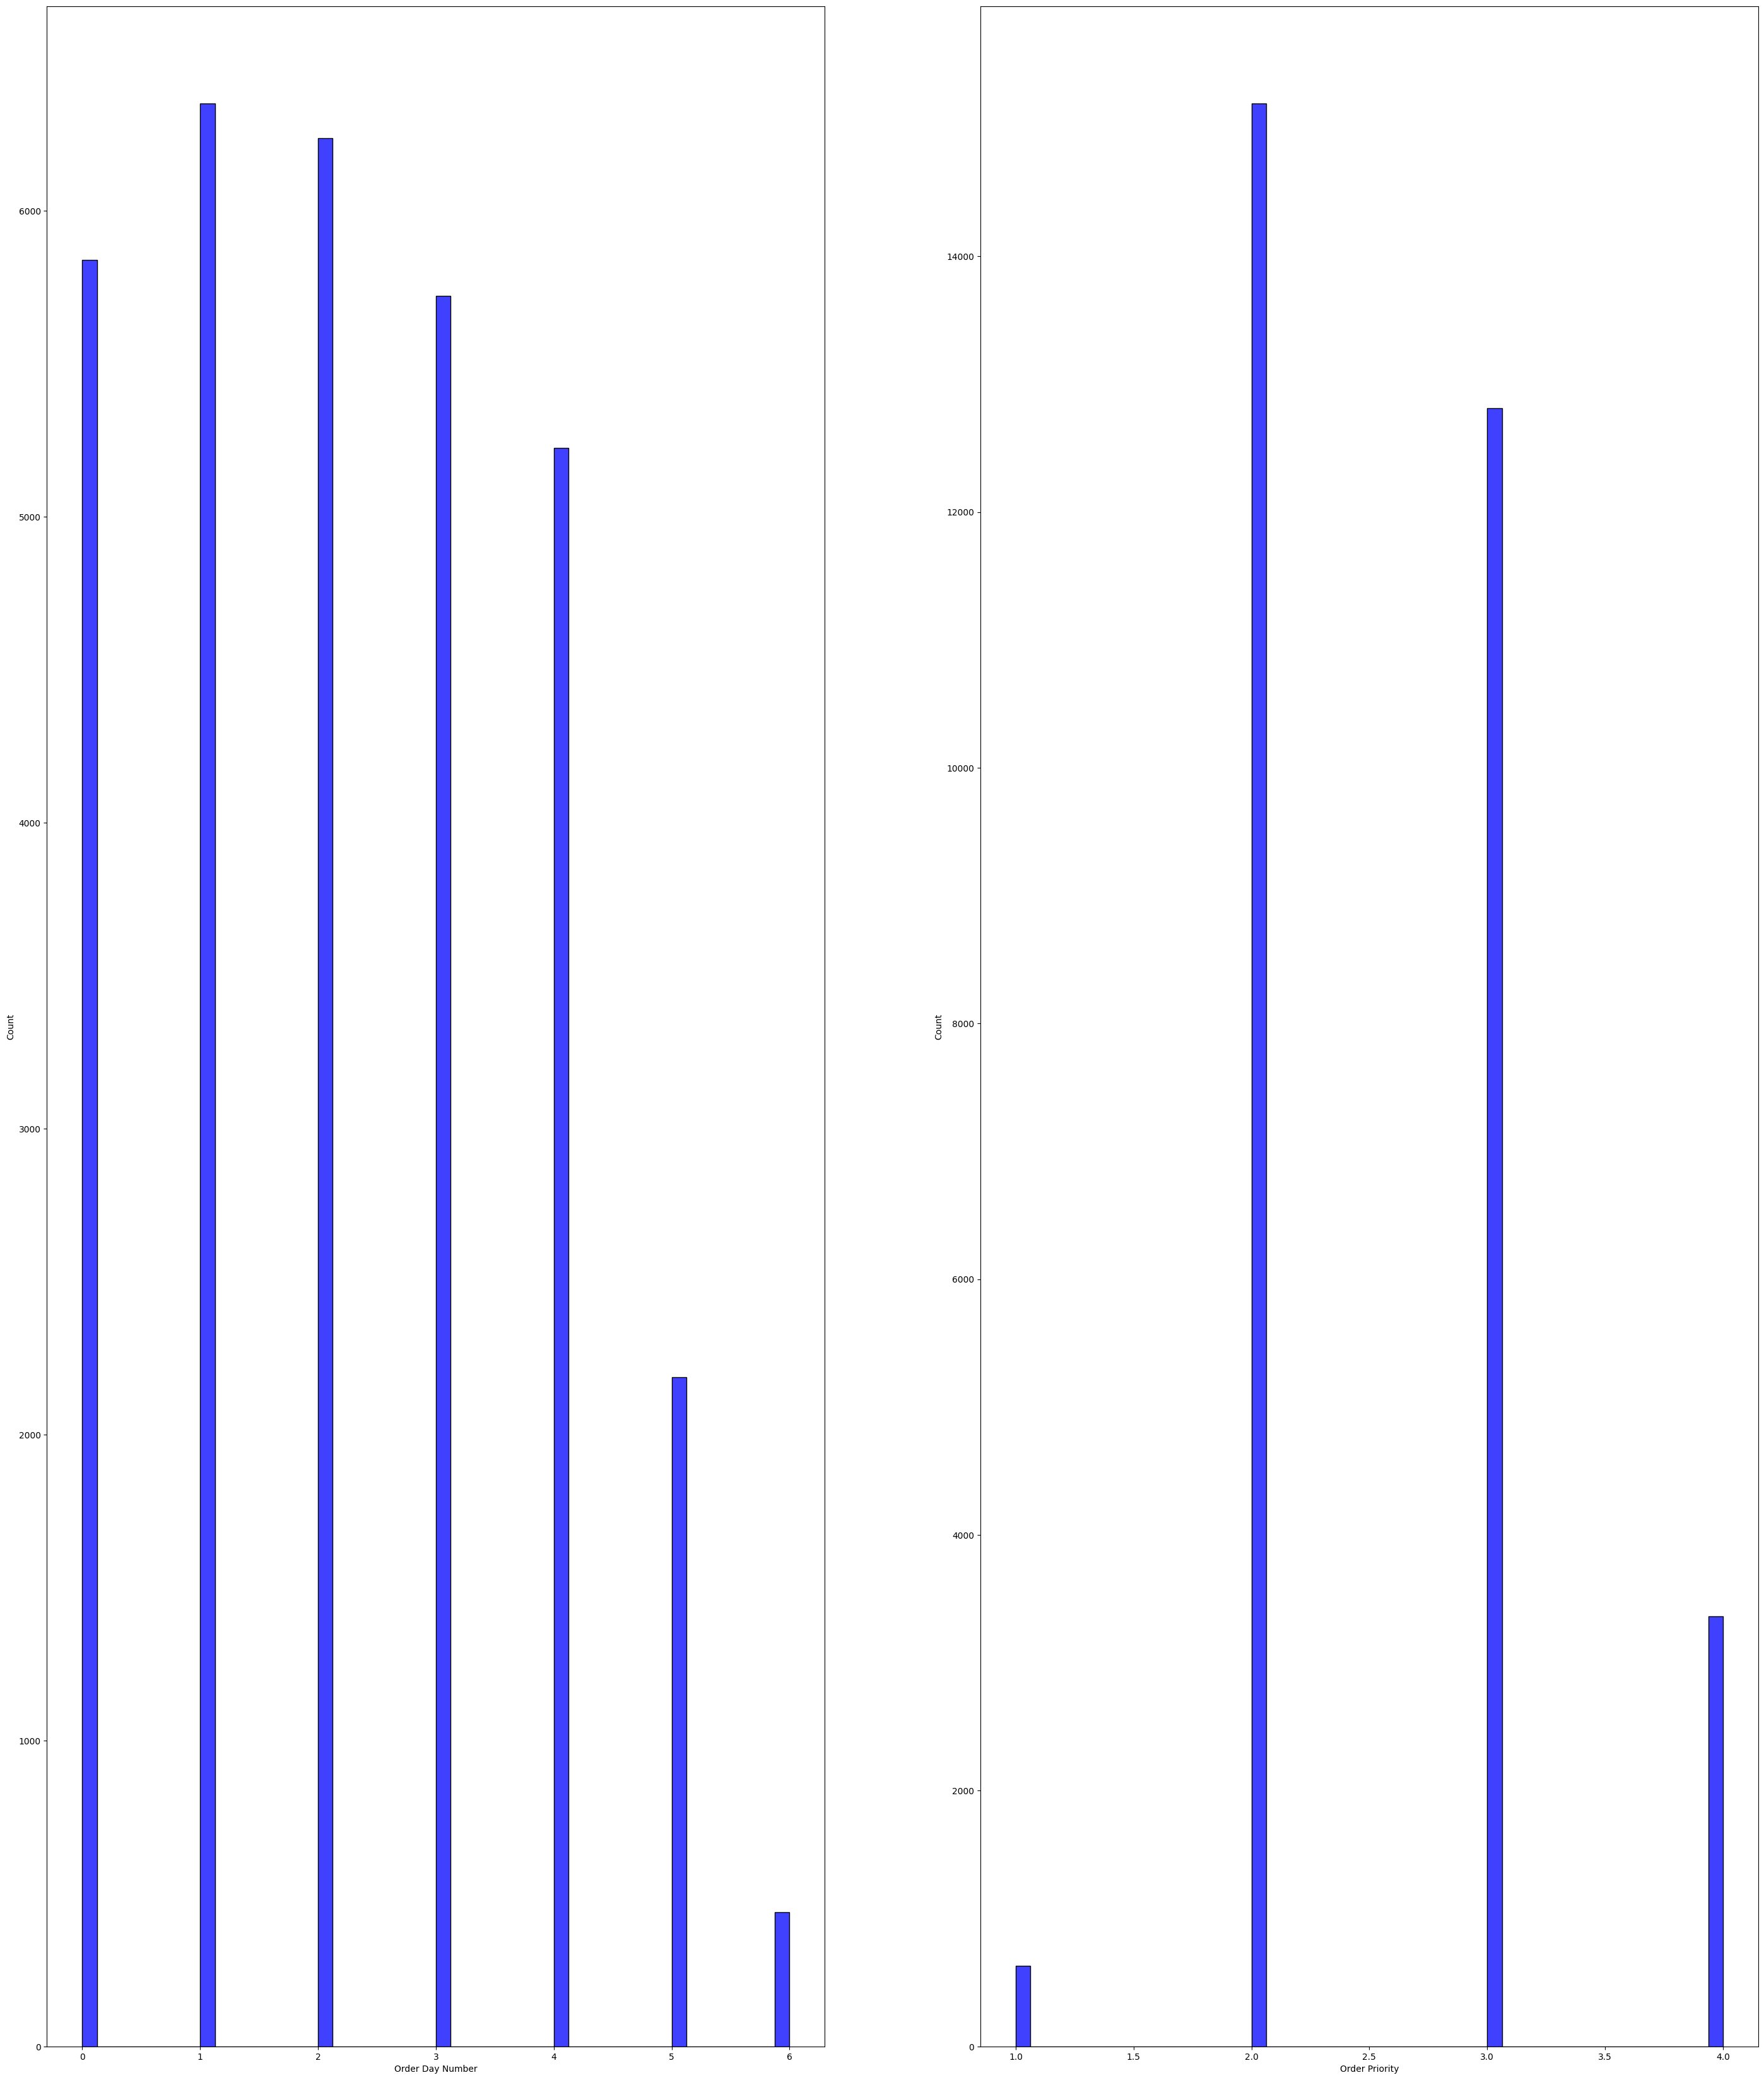

In [113]:
fig , axes = plt.subplots(1, 2, figsize=(35, 42))

axes = axes.flatten()
for i , feature in enumerate(['Order Day Number',
       'Order Priority']):
    sns.histplot(X_train_resampled, x=feature, ax=axes[i], color="blue")

y_train_resampled

In [115]:
#fig , axes = plt.subplots(1, 1, figsize=(35, 42))

#axes = axes.flatten()

#sns.histplot(y_train_resampled, color="blue")

In [114]:
#rf_classifier = RandomForestClassifier(n_estimators=300,max_depth=20,class_weight = {1: 1.0, 2: 3.0,3:4.0,4:8.0}, random_state=42)
#rf_classifier.fit(X_train, y_train)
#y_pred = rf_classifier.predict(X_test_scaled)
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy:.2f}")
#print("\nClassification Report:")
#print(classification_report(y_test, y_pred))

Accuracy: 0.60

Classification Report:
              precision    recall  f1-score   support

           1       0.60      1.00      0.75      8714
           2       0.00      0.00      0.00      2953
           3       0.00      0.00      0.00      2168
           4       0.00      0.00      0.00       739

    accuracy                           0.60     14574
   macro avg       0.15      0.25      0.19     14574
weighted avg       0.36      0.60      0.45     14574



In [105]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
49628    1
49629    1
49630    1
49633    1
49634    1
Name: Ship Mode, Length: 34760, dtype: int64

In [148]:
"""rf_classifier = RandomForestClassifier(n_estimators=200,max_depth=10,class_weight='balanced_subsample',bootstrap = True,oob_score = True,n_jobs = -1, random_state=42)
rf_classifier.fit(X_train_resampled_scaled, y_train_resampled)
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))"""

Accuracy: 0.56

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.76      0.76      8714
           2       0.28      0.21      0.24      2953
           3       0.26      0.38      0.31      2168
           4       0.11      0.05      0.07       739

    accuracy                           0.56     14574
   macro avg       0.35      0.35      0.34     14574
weighted avg       0.55      0.56      0.55     14574



In [145]:
rf_classifier = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_leaf =  1,min_samples_split = 2,n_jobs = -1, random_state=42)
rf_classifier.fit(X_train_resampled_scaled, y_train_resampled)
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.56

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.76      0.76      8714
           2       0.28      0.22      0.24      2953
           3       0.27      0.38      0.32      2168
           4       0.08      0.04      0.05       739

    accuracy                           0.56     14574
   macro avg       0.35      0.35      0.34     14574
weighted avg       0.55      0.56      0.55     14574



In [135]:
X_test

,Order Day Number,Order Priority,Sales,Discount,Profit,Quantity,Market_Africa,Market_Apac,Market_Canada,Market_Emea,...,Region_Emea,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Consumer,Segment_Corporate,Segment_Home Office
5,4,2,19.68,0.0,6.4944,6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
10,0,3,12.96,0.0,6.2208,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32,3,3,204.60,0.0,53.1960,2,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
33,3,3,6.48,0.0,3.1104,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
34,3,3,62.18,0.0,16.7886,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49614,2,2,100.40,0.0,8.0000,5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49616,3,2,25.36,0.0,12.1600,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49631,2,2,199.28,0.0,89.6400,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49632,2,2,180.60,0.0,7.2000,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


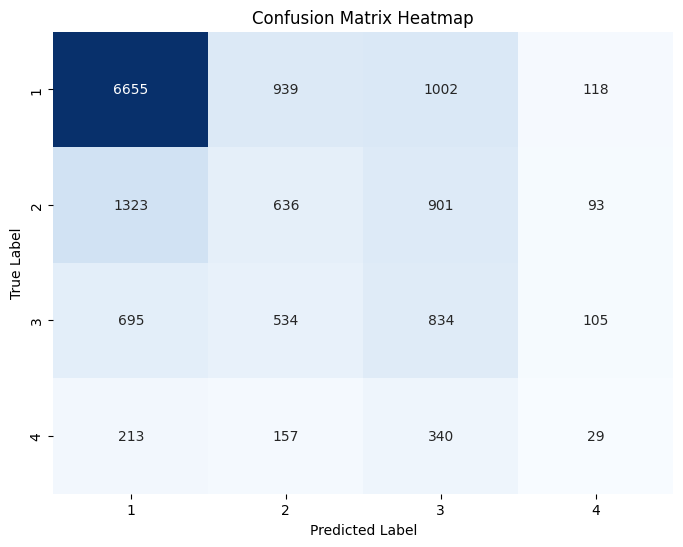

In [139]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.savefig('heatmap0000_output.png', dpi=300, bbox_inches='tight')
plt.show()

In [118]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 15,30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(n_jobs = -1 , random_state=42), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_resampled_scaled, y_train_resampled)
print("Best parameters:", grid_search.best_params_)
rf_classifier = grid_search.best_estimator_
y_pred = rf_classifier.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       0.72      0.60      0.65      8825
           2       0.24      0.33      0.28      3106
           3       0.24      0.30      0.26      2165
           4       0.12      0.08      0.10       779

    accuracy                           0.47     14875
   macro avg       0.33      0.33      0.32     14875
weighted avg       0.52      0.47      0.49     14875



In [129]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20,15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced_subsample' , random_state=42), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
rf_classifier = grid_search.best_estimator_
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           1       0.71      0.84      0.77      8825
           2       0.29      0.17      0.21      3106
           3       0.29      0.29      0.29      2165
           4       0.14      0.08      0.10       779

    accuracy                           0.58     14875
   macro avg       0.36      0.34      0.34     14875
weighted avg       0.53      0.58      0.55     14875



In [202]:
rf_classifier = RandomForestClassifier(n_estimators=200,max_depth=10,n_jobs = -1, random_state=42)
rf_classifier.fit(X_train_resampled_scaled, y_train_resampled)
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.61

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.78      0.78      9041
           2       0.31      0.18      0.23      3000
           3       0.31      0.46      0.37      2144

    accuracy                           0.61     14185
   macro avg       0.46      0.48      0.46     14185
weighted avg       0.61      0.61      0.60     14185



In [203]:
y_pred_train = rf_classifier.predict(X_train_resampled_scaled)
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
print("Training Data Accuracy:", train_accuracy)

Training Data Accuracy: 0.6160333333333333


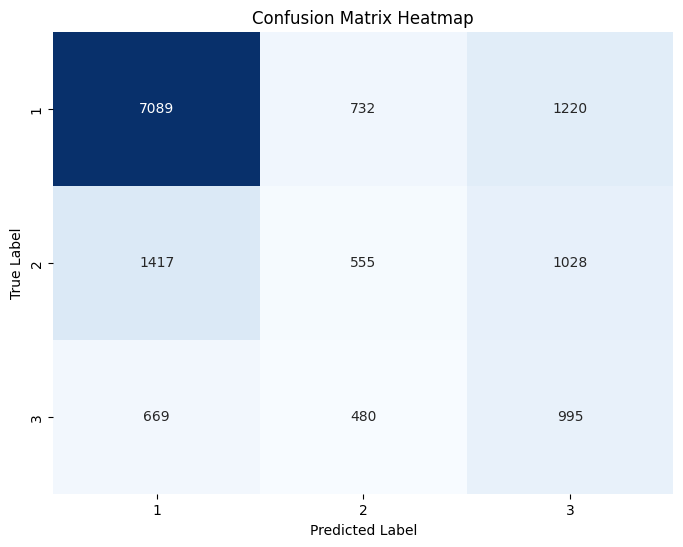

In [204]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.savefig('heatmap000_output.png', dpi=300, bbox_inches='tight')
plt.show()

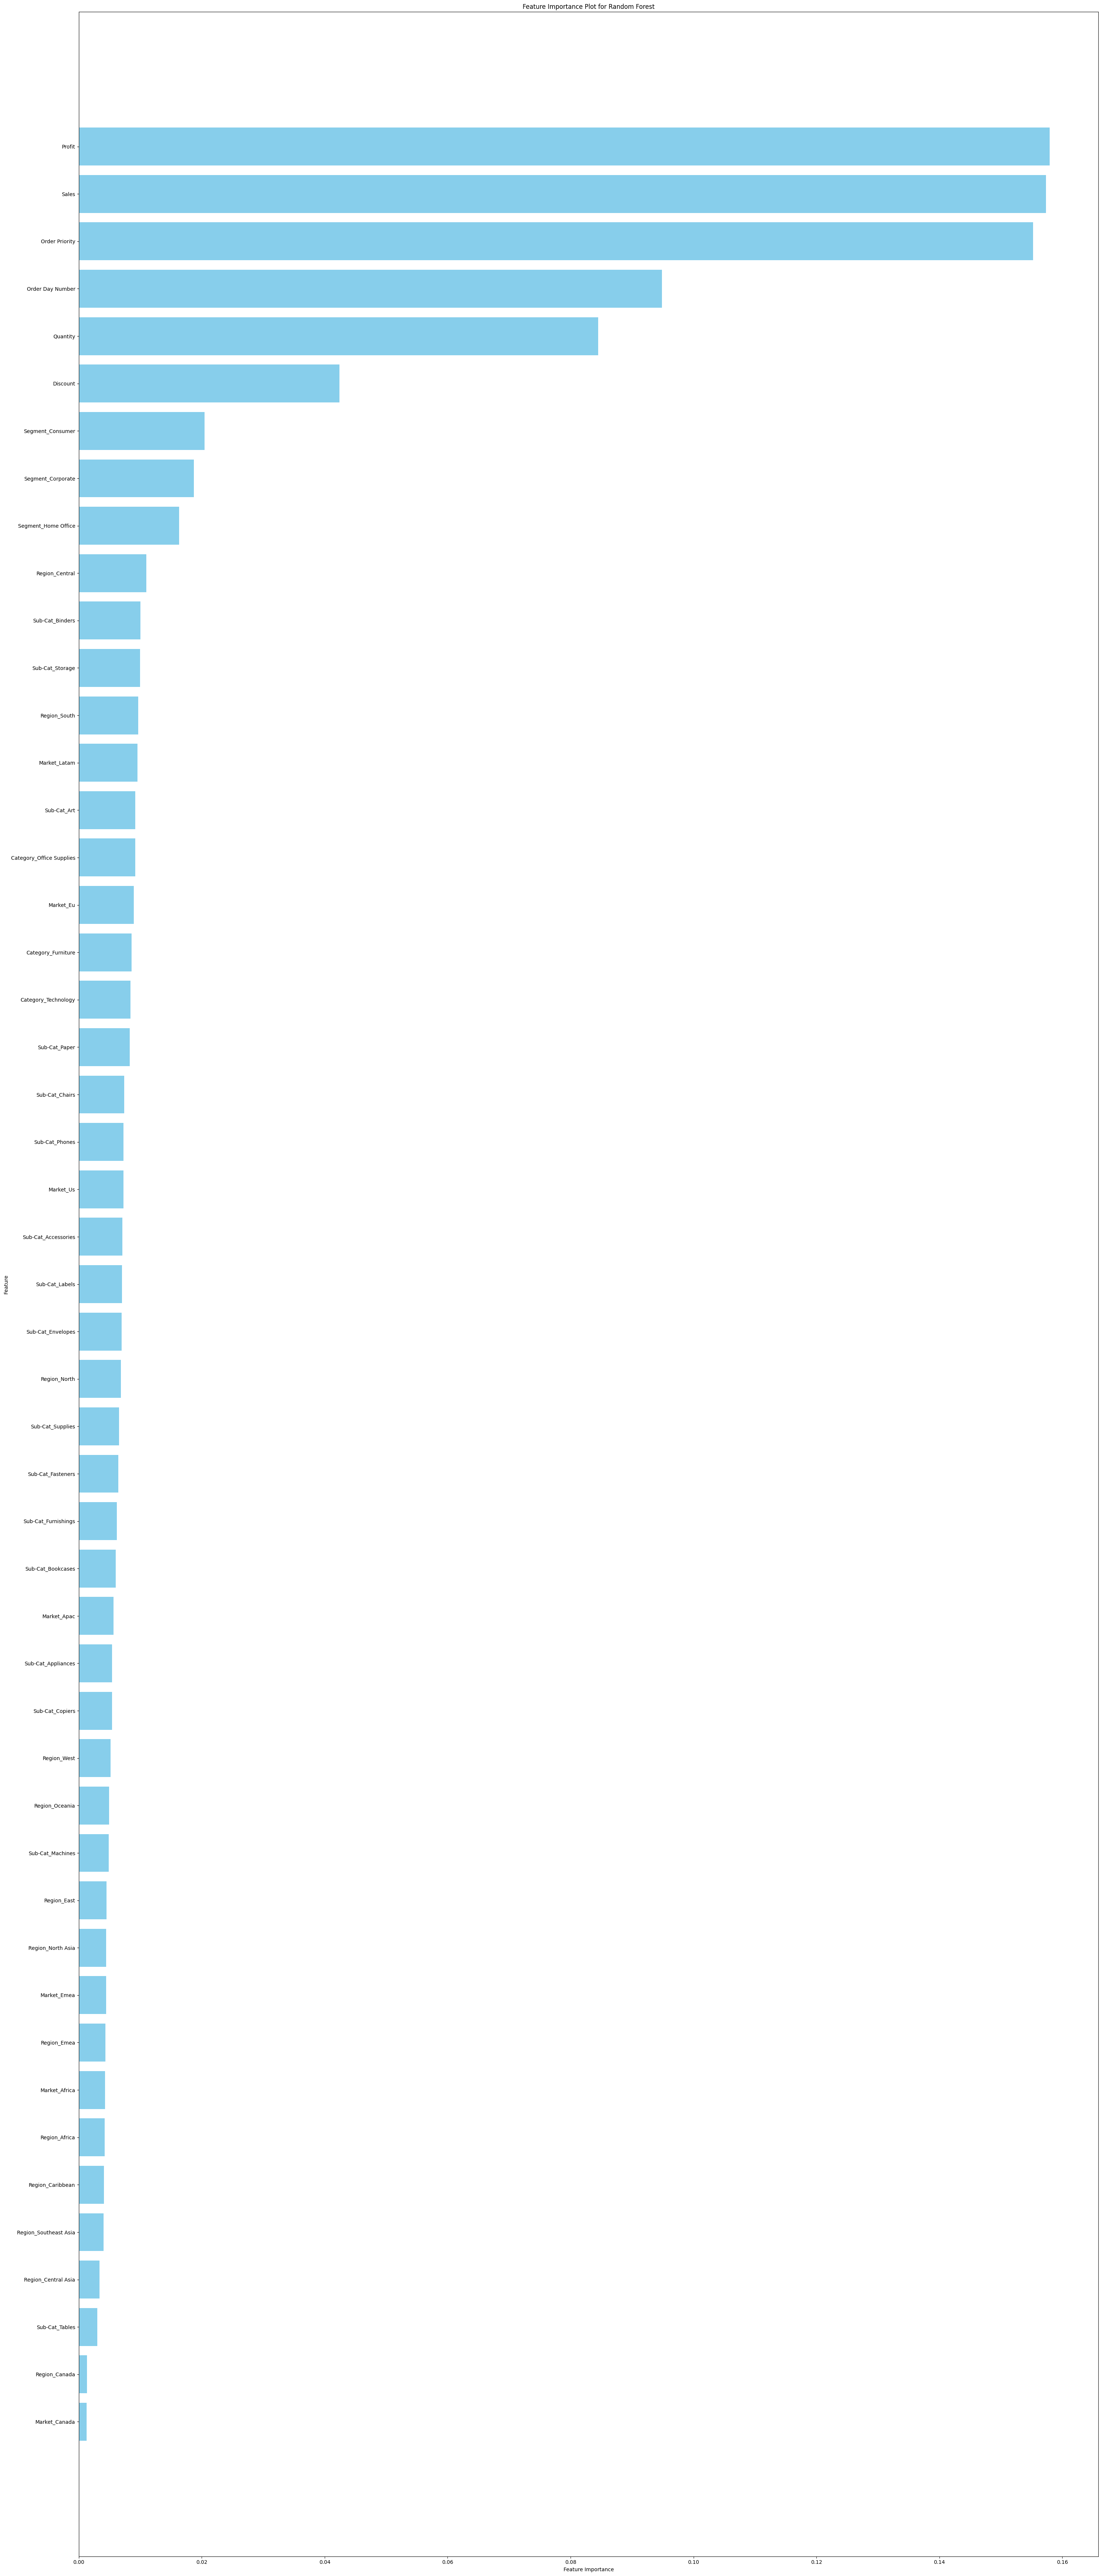

In [119]:

feature_importances = rf_classifier.feature_importances_
feature_names = X_train_resampled_scaled.columns if hasattr(X_train_resampled_scaled, 'columns') else [f'Feature {i}' for i in range(X_train_resampled_scaled.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(30, 70))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot for Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('features_output.png', dpi=300, bbox_inches='tight')
plt.show()

In [214]:
feature_names = X_train_resampled_scaled.columns if hasattr(X_train_resampled_scaled, 'columns') else [f'Feature {i}' for i in range(X_train_resampled_scaled.shape[1])]

In [215]:
list(importance_df["Feature"][:20].values)

['Order Priority',
 'Sales',
 'Profit',
 'Segment_Consumer',
 'Segment_Home Office',
 'Segment_Corporate',
 'Discount',
 'Order Day Number',
 'Quantity',
 'Market_Apac',
 'Market_Latam',
 'Region_Central',
 'Category_Office Supplies',
 'Market_Eu',
 'Region_South',
 'Category_Furniture',
 'Market_Us',
 'Category_Technology',
 'Sub-Cat_Storage',
 'Market_Emea']

In [217]:
X_train_features = X_train_resampled_scaled[list(importance_df["Feature"][:20].values)]

In [218]:
X_test_features = X_test_scaled[list(importance_df["Feature"][:20].values)]

In [1]:
"""rf_classifier = RandomForestClassifier(n_estimators=300,max_depth=20,class_weight='balanced_subsample',n_jobs = -1, random_state=42)
rf_classifier.fit(X_train_features, y_train_resampled)
y_pred = rf_classifier.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))"""

'rf_classifier = RandomForestClassifier(n_estimators=300,max_depth=20,class_weight=\'balanced_subsample\',n_jobs = -1, random_state=42)\nrf_classifier.fit(X_train_features, y_train_resampled)\ny_pred = rf_classifier.predict(X_test_features)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {accuracy:.2f}")\nprint("\nClassification Report:")\nprint(classification_report(y_test, y_pred))'

In [206]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 192.4 kB/s  0:00:11 eta 0:00:01


In [220]:
import xgboost as xgb

In [221]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [222]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [223]:
y_train_map = y_train - 1

In [224]:
y_test_map = y_test - 1

In [220]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train_features, y_train_map)

y_pred = xgb_model.predict(X_test_features)

print(confusion_matrix(y_test_map, y_pred))

[[8587  142   89    7]
 [2536  199  350   21]
 [1580  217  343   25]
 [ 520   79  166   14]]


In [222]:
from sklearn.ensemble import GradientBoostingClassifier

In [227]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.3,
    max_depth=15, random_state=42).fit(X_train_features, y_train)

In [228]:
clf.score(X_test_features, y_test)

0.5933445378151261

In [225]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(100,50), 
    activation='relu',          
    solver='adam',              
    alpha=0.002,                
    learning_rate='adaptive',   
    learning_rate_init=0.001,   
    max_iter=400,               
    batch_size=200,             
    early_stopping=True,        
    validation_fraction=0.1,    
    random_state=42       
)

In [226]:
clfm = mlp.fit(X_train_features, y_train_resampled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [227]:
clfm.score(X_test_features, y_test)

0.6056397603101868

In [228]:
y_pred = clfm.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.61

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.80      0.77      9041
           2       0.29      0.28      0.28      3000
           3       0.32      0.26      0.29      2144

    accuracy                           0.61     14185
   macro avg       0.46      0.44      0.45     14185
weighted avg       0.59      0.61      0.60     14185



In [111]:
from sklearn.svm import SVC

In [118]:
class_weights = {1: 1.0, 2: 3.0, 3: 4.0, 4: 7.0}
svm_model = SVC(kernel='rbf', class_weight=class_weights, random_state=42)
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,"{1: 1.0, 2: 3.0, 3: 4.0, 4: 7.0}"
,verbose,False


In [119]:
y_pred = svm_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[6792  279 1728   26]
 [1464  165 1440   37]
 [ 648  111 1371   35]
 [ 169   57  539   14]]

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.77      0.76      8825
           2       0.27      0.05      0.09      3106
           3       0.27      0.63      0.38      2165
           4       0.12      0.02      0.03       779

    accuracy                           0.56     14875
   macro avg       0.35      0.37      0.31     14875
weighted avg       0.55      0.56      0.53     14875



In [115]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

class_weights = {1: 1.0, 2: 3.0, 3: 4.0, 4: 7.0}  
# Train SVM
svm_model = SVC(kernel='rbf', class_weight=class_weights, random_state=42, C=1.0)
svm_model.fit(X_train_resampled, y_train_resampled)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,"{1: 1.0, 2: 5.0, 3: 5.0, 4: 10.0}"
,verbose,False


In [117]:
y_pred = svm_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 175  107  228 8315]
 [  71   29   42 2964]
 [  44   26   40 2055]
 [  17    5   11  746]]

Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.02      0.04      8825
           2       0.17      0.01      0.02      3106
           3       0.12      0.02      0.03      2165
           4       0.05      0.96      0.10       779

    accuracy                           0.07     14875
   macro avg       0.23      0.25      0.05     14875
weighted avg       0.40      0.07      0.04     14875



In [248]:
y_pred = clfm.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

           1       0.64      1.00      0.78      8825
           2       0.45      0.01      0.03      3106
           3       0.43      0.21      0.29      2165
           4       0.00      0.00      0.00       779

    accuracy                           0.63     14875
   macro avg       0.38      0.31      0.27     14875
weighted avg       0.54      0.63      0.51     14875

